In [5]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
# Para series de tiempo
import statsmodels.api as sm
import numpy as np

# La librería statsmodel tiene implementaciones de SARIMA y de Holt-Winters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Si el computador tiene procesadores múltiples, se aprovecharán
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed


import pandas as pd
from numpy import mean
from numpy import median
from numpy import array
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random
from math import sqrt
from sklearn.metrics import mean_squared_error

#
from warnings import catch_warnings
from warnings import filterwarnings

# La librería statsmodel tiene implementaciones de SARIMA y de Holt-Winters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing


from prophet import Prophet

#
from warnings import catch_warnings
from warnings import filterwarnings

%matplotlib inline

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"









### 1. Haga un análisis exploratorio de los datos que se le presentan (AverageTemperature), se sugiere explorar el comportamiento de la variable y si está distribuidas normalmente, en caso de ser continuas. Meses en los que más/menos  temperatura  hay, comportamiento en los últimos x años,  etc.

In [18]:
df = pd.read_csv("GlobalLandTemperaturesByCountry.csv", index_col=0)

Se observan los tipos de datos que hay en el dataframe

In [4]:
df.head()

AverageTemperature  AverageTemperatureUncertainty Country
dt                                                                   
1743-11-01               4.384                          2.294   Åland
1743-12-01                 NaN                            NaN   Åland
1744-01-01                 NaN                            NaN   Åland
1744-02-01                 NaN                            NaN   Åland
1744-03-01                 NaN                            NaN   Åland

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577462 entries, 1743-11-01 to 2013-09-01
Data columns (total 3 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AverageTemperature             544811 non-null  float64
 1   AverageTemperatureUncertainty  545550 non-null  float64
 2   Country                        577462 non-null  object 
dtypes: float64(2), object(1)
memory usage: 17.6+ MB


In [6]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Se observa la cantidad de datos vacios en el dataframe

In [6]:
df.isnull().sum()

AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

Se puede observar que los datos tienen una distribucion  sesgada a la izquierda

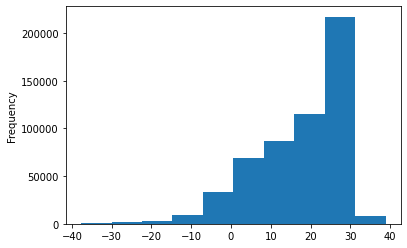

In [7]:
df['AverageTemperature'].plot.hist();


### 2. Haga una serie univariante por la variable AverageTemperature: 


### a. Especifique Inicio, fin, y frecuencia. 


Trabajaremos a partir del año **1900 hasta 2013**, con una frecuencia de 

<AxesSubplot:>

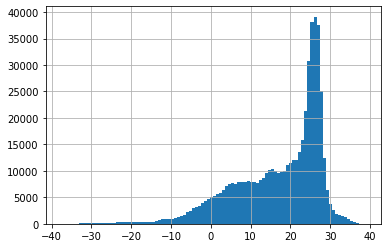

In [8]:
df['AverageTemperature'].hist(bins=100)

**Comentario.** La frecuencia es más mayor para valores entre 20 y 30. 

### b. Haga un gráfico de la serie y explique qué información puede obtener a primera vista.


##### Gráfica del año promedio mundial de temperatura, del año 2000 a septiembre de 20013

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

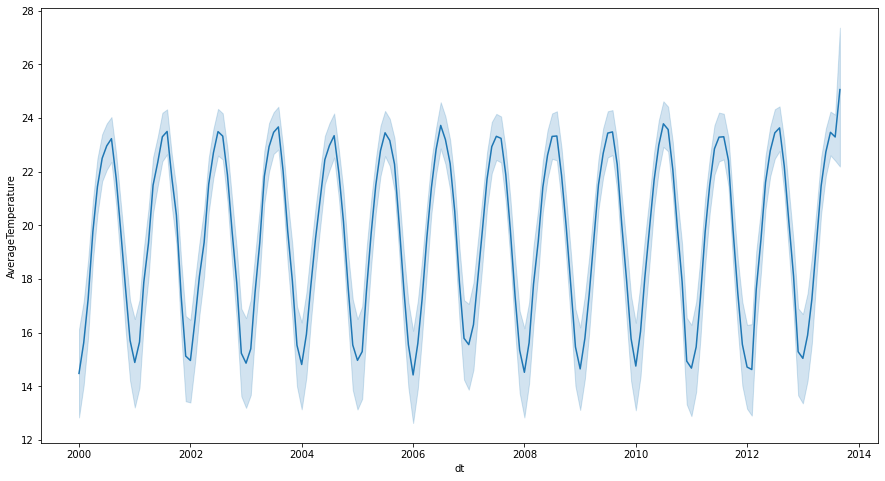

In [12]:
series = pd.read_csv('GlobalLandTemperaturesByCountry.csv', header=0, 
                     parse_dates = ["dt"], index_col = 0)

# Eliminamos la columna de AverageTemperatureUncertainty
temp = series.drop(['AverageTemperatureUncertainty'], axis=1)


temp1 = temp.loc['2000-01-01':].reset_index(drop=False)


plt.figure(figsize = (15,8))
sns.lineplot(x = 'dt', y = 'AverageTemperature',data = temp1)

**Comentario.** No se graficaron todos los años en una gráfica, por la gran cantidad de datos, la capacidad de nuestro ordenador no fue suficiente.

**Conclusión.** La gráfica es estacional, puesto que cada fin y comienzo de año la temperatura es la más baja y aproximadamente luego de medio año julio/agosto se observan las temperaturas más altas. No muestra una tendencia constante, en estos últimos 13 años, la temperatura se mantiene constante a lo largo del tiempo.

#### Gráfico de los últimos 100 años

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

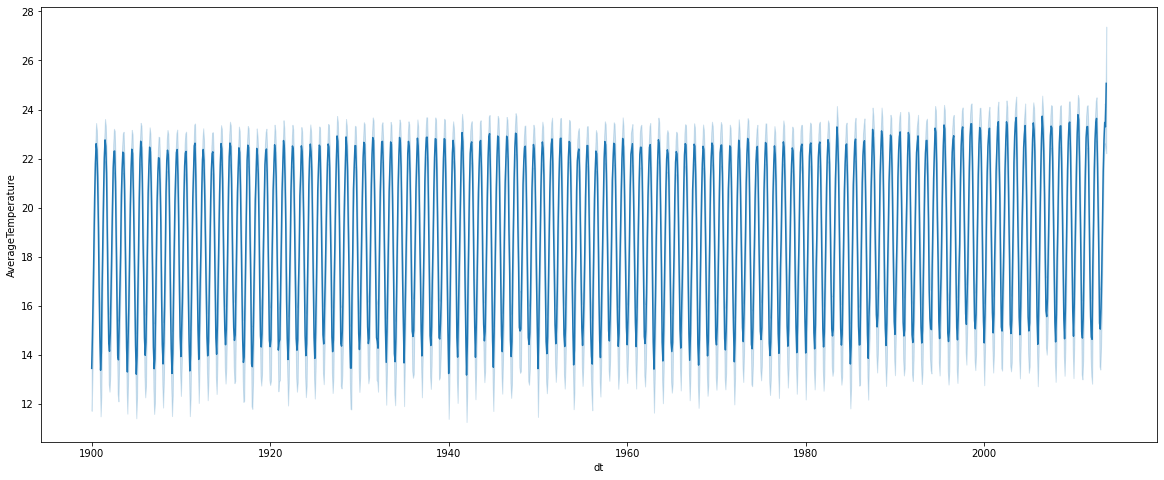

In [13]:
# Ultimos 100 años

temp2 = temp.loc['1900-01-01':].reset_index(drop=False)


plt.figure(figsize = (20,8))
sns.lineplot(x = 'dt', y = 'AverageTemperature',data = temp2)

**Comentario.** En los últimos 100 años la tendencia se mantiene constante, no parece incrementar ni descender la temperatura, aunque a partir de 1980 parace haber una leve tendencia de aumento hasta 2013

### c. Descomponga la serie en sus componentes. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionalidad. 


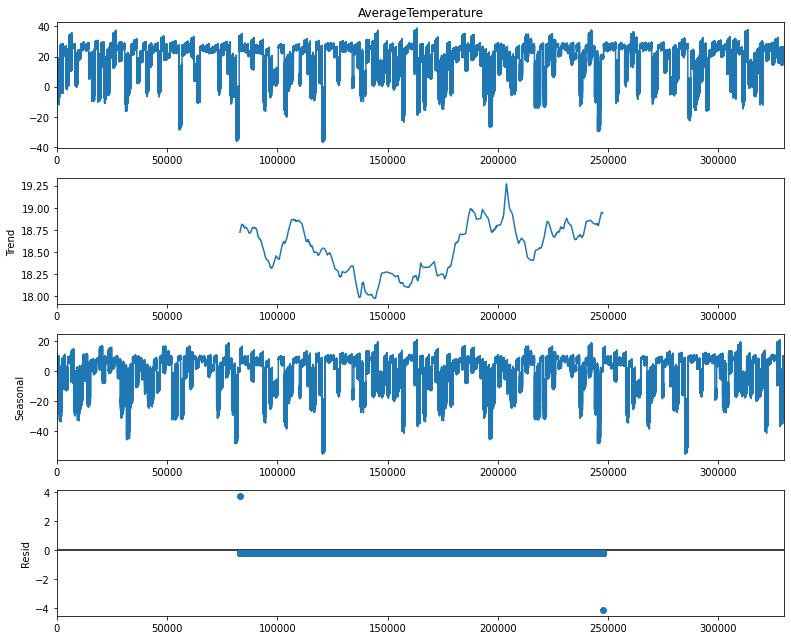

"\n#https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/\n\n# Ejemplo de descomposición de serie de tiempo\n\ndescomposicion = sm.tsa.seasonal_decompose(temp['AverageTemperature'],\n                                                  model='additive', freq=12)  \n\nfigure = descomposicion.plot(figsize=(10, 8))\nplt.figure(figsize=(10, 8))\n"

In [14]:
# https://soloelectronicos.com/2021/06/27/visualizacion-de-series-temporales-con-python-3/
#period=164409
temp = temp2
temp = temp.dropna()

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(temp['AverageTemperature'],model='additive', period=164409)
                                                  
fig = decomposition.plot()
plt.show()

"""
#https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/

# Ejemplo de descomposición de serie de tiempo

descomposicion = sm.tsa.seasonal_decompose(temp['AverageTemperature'],
                                                  model='additive', freq=12)  

figure = descomposicion.plot(figsize=(10, 8))
plt.figure(figsize=(10, 8))
"""

**Comentario.** 

Observando la **tendencia**, vemos que en los últimos años, se tiene un ligero aumento, pero no es muy grande

**Estacionalidad.** Vemos que la gráfica repite un ciclo cada cierto tiempo, tiene picos negativos marcados, luego regresa a oscilar al rededor de cero.

No se observa comportamiento muy aleatorio

### d. Determine si es necesario transformar la serie. Explique. 


No es necesario transformar los datos, ya que la serie no tuvo una tendencia que aumentara fuertemente y su varianza fue constante.

### e. Una   vez   analizada   la   serie,   elija   los  parámetros   p,   q   y   d   del   modelo   ARIMA   o SARIMA 


### f. Haga varios modelos SARIMA, y diga cuál es el mejor de ellos para estimar los datos de la serie. 


In [7]:
# division_entreno_prueba([1,2,3,4,5],2)

def division_entreno_prueba(datos, n_prueba):
    return datos[:-n_prueba], datos[-n_prueba:]

def medir_rmse(actual, predicho):
    return sqrt(mean_squared_error(actual, predicho))

**Predicción Sarima**

In [8]:
# validación "walk-forward" para datos univariados
def validacion_al_frente(datos, n_prueba, metodo, cfg):
    predicciones = []
    # dividir el conjunto de datos
    entreno, prueba = division_entreno_prueba(datos, n_prueba)
    # grabar la historia con el conjunto de datos de entrenamiento
    historia = [x for x in entreno]
    # pasar por cada incremento de tiempo en el conjunto de prueba
    for i in range(len(prueba)):
        # ajustar el modelo a los datos y predecir los datos históricos
        if metodo == "promedio":
            yhat = prediccion_promedio(historia, cfg)
        elif metodo == "sarima":
            yhat = prediccion_sarima(historia, cfg)
        elif metodo == "exp":
            yhat = prediccion_alisamiento_exp(historia, cfg)
        # agregar el dato predicho en la lista de preducciones
        predicciones.append(yhat)
        # agregar la observación a la historia para la siguiente iteración
        historia.append(prueba[i])
    # estimar el error de las predicciones
    error = medir_rmse(prueba, predicciones)
    return [error, predicciones]

In [9]:
def busqueda_malla(datos, lista_cfg, n_prueba, metodo = "sarima", paralelo = True):
    resultados = None
    if paralelo:
        # ejecutar las configuraciones en paralelo
        executor = Parallel(n_jobs = cpu_count(), backend = 'multiprocessing') 
        tareas = (delayed(calificar_modelo)(datos, n_prueba, metodo, cfg) for cfg in lista_cfg) 
        resultados = executor(tareas)
    else:
        resultados = [calificar_modelo(datos, n_prueba, metodo, cfg) for cfg in lista_cfg]
    # eliminar resultados vacíos
    resultados = [r for r in resultados if r[1] != None]
    return resultados

In [10]:
def prediccion_sarima(historia, config):
    orden, orden_estacional, tendencia = config
    # definir el modelo
    modelo = SARIMAX(historia, order = orden, seasonal_order = orden_estacional, trend = tendencia,
      enforce_stationarity = False, enforce_invertibility = False)
    # ajustar el model con los datos
    modelo_ajustado = modelo.fit(disp = False)
    # hacer la predicción de un paso
    yhat = modelo_ajustado.predict(len(historia), len(historia))
    return yhat[0]

def config_sarima(estacional = [0]):
    modelos = []
    # definir las listas de configuración
    p_params = [0, 1, 2]
    d_params = [0, 1]
    q_params = [0, 1, 2]
    t_params = ['n','c','t','ct'] 
    P_params = [0, 1, 2]
    D_params = [0, 1]
    Q_params = [0, 1, 2]
    m_params = estacional
    # crear instancias de configuración
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    modelos.append(cfg)
    return modelos

In [11]:
def calificar_modelo(datos, n_prueba, metodo, cfg, debug = False):
    resultado = None
    predicciones = None
    # convertir la confiuración a una llave
    llave = str(cfg)
    if debug:
        resultado, predicciones = validacion_al_frente(datos, n_prueba, metodo, cfg)
    else:
        # una falla durante la validación del modelo sugiere una configuración inestable
        try:
        # nunca mostrar advertencias cuando se busca en malla...demasiado "ruido"
            with catch_warnings():
                filterwarnings("ignore")
                resultado, predicciones = validacion_al_frente(datos, n_prueba, metodo, cfg)
        except:
            error = None
    if resultado is not None:
        print(f' > Modelo{llave} {resultado:.3f}')
    return (llave, resultado, predicciones)

In [12]:
def encontrar_mejor_solucion(series, nombre, metodo = "sarima", muestra = False):
    datos = series.values
    resultados = []
    # dividir los datos
    
    #--------------------------------- Cambio de n_prueba, 
    # ---------------3 años
    n_prueba = 3 # porcenta usado para prueba
    long_max = len(datos) - n_prueba
    print(f"Tamaño Entrenamiento {long_max}")
    print(f"Tamaño Prueba {n_prueba}")
    
    #------------------------------------------------
    
    
    
    # configuraciones de los modelos
    if metodo == "sarima":
        print(f"Encontrando la mejor solución para {metodo}")
        lista_cfg = config_sarima()
    elif metodo == "promedio":
        print(f"Encontrando la mejor solución para {metodo}")
        lista_cfg = config_simple(long_max)
    elif metodo == "exp":
        print(f"Encontrando la mejor solución para {metodo}")
        lista_cfg = config_alisamiento_exp()
        datos = datos[:,0]
    # muestrear algunos
    if muestra:
        lista_cfg_azar = random.sample(lista_cfg, k = 25)
        while len(resultados) < 5:
            lista_cfg_azar = random.sample(lista_cfg, k = 25)
            resultados += busqueda_malla(datos, lista_cfg_azar, n_prueba, metodo)
    else:
        # búsqueda en malla
              
        # Si se tiene capacidad de procesamiento paralelo, paralelo = True (default)
        paralelo = True
        resultados = busqueda_malla(datos, lista_cfg, n_prueba, metodo, paralelo)
        
    
    # ordenan las configuraciones por error, ascendente
    resultados.sort(key = lambda tup: tup[1])

    print('terminado')
    # listar las mejores 3 configuraciones
    for cfg, error, predicciones in resultados[:3]:
        print(cfg, error)

    # desplegar
    entreno, prueba = division_entreno_prueba(datos, n_prueba)
    prediccion = pd.DataFrame(list(entreno.flatten()) + resultados[0][2])
    ax = pd.DataFrame(datos).plot(label = "Original") # Datos originales
    prediccion.plot(ax = ax, alpha = .7, figsize = (14,7))
    # Esconder las líneas de malla de la gráfica
    # ax.grid(False)

    # Esconder las marcas en los ejes
    #ax.set_xticks([])
    #ax.set_yticks([])
    
    plt.savefig(f"{nombre}_{metodo}.png", transparent = True)
    plt.show()

In [15]:
temp3 = temp1.loc['2010-01-01':].reset_index(drop=False)
mundial = temp3.groupby(['dt']).mean()
mundial = mundial.loc['2010-01-01':].reset_index(drop=False)
sar = mundial[["dt","AverageTemperature"]]
sar = sar.groupby(["dt"]).mean()
sar

AverageTemperature
dt                            
2010-01-01           14.884364
2010-02-01           16.283107
2010-03-01           18.270760
2010-04-01           20.127421
2010-05-01           21.874174
2010-06-01           23.082099
2010-07-01           23.899364
2010-08-01           23.677339
2010-09-01           22.260446
2010-10-01           20.065785
2010-11-01           18.117843
2010-12-01           15.160479
2011-01-01           14.847835
2011-02-01           15.622570
2011-03-01           17.601215
2011-04-01           19.925254
2011-05-01           21.654508
2011-06-01           22.983852
2011-07-01           23.289180
2011-08-01           23.390443
2011-09-01           22.541066
2011-10-01           19.998951
2011-11-01           17.605336
2011-12-01           15.550852
2012-01-01           14.689656
2012-02-01           14.586197
2012-03-01           17.721779
2012-04-01           19.592000
2012-05-01           21.740066
2012-06-01           22.873016
2012-07-01           23.519221
2012-08-01           23.698926
2012-09-01           22.321057
2012-10-01           20.247066
2012-11-01           18.190057
2012-12-01           15.261836
2013-01-01           14.942975
2013-02-01           15.861893
2013-03-01           17.320320
2013-04-01           19.491172
2013-05-01           21.625254
2013-06-01           22.808926
2013-07-01           23.522303
2013-08-01           23.432623
2013-09-01           22.988750

In [6]:
import eia
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm_api
import itertools
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [7]:
def retrieve_time_series(api, series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=series_ID)
    ##Create a pandas dataframe from the retrieved time series
    df = pd.DataFrame(series_search)
    return df

def plot_data(df, x_variable, y_variable, title):
    """
    Plot the x- and y- variables against each other, where the variables are columns in
    a pandas dataframe
    Args:
        df: Pandas dataframe. 
        x_variable: String. Name of x-variable column
        y_variable: String. Name of y-variable column
        title: String. Desired title name
    """
    fig, ax = plt.subplots()
    ax.plot_date(df[x_variable], 
                 df[y_variable], marker='', linestyle='-', label=y_variable)
    fig.autofmt_xdate()
    plt.title(title)
    plt.show()

def decompose_time_series(series, frequency):
    """
    Decompose a time series and plot it in the console
    Arguments: 
        series: series. Time series that we want to decompose
    Outputs: 
        Decomposition plot in the console
    """
    result = seasonal_decompose(series, model='additive', freq = frequency)
    result.plot()
    plt.show()
    
def time_series_train_test_split(time_series, train_split_fraction):
    """
    Split the data into training and test set.
    """
    split_index = int(round(time_series.shape[0]*train_split_fraction, 0))
    train_set = time_series[:split_index]
    test_set = time_series[:-split_index]
    return train_set, test_set

def sarima_parameter_search(search_range, seasonal = [12]):
    """
    Get all of the parameter combinations for a SARIMA model.
    """
    p = q = d = range(0, search_range)
    trend = ['n','c','t','ct']
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq_combinations = [(x[0], x[1], x[2], x[3], x[4]) for x in list(itertools.product(p, d, q, seasonal, trend))]
    return pdq, seasonal_pdq_combinations

def seasonal_arima_model(time_series, order, seasonal_order, trend):
    """
    Generate a seasonal ARIMA model using a set of hyperparameters. Returns the model fit, and the 
    associated model AIC and BIC values.
    """ 
    try:
        model = SARIMAX(time_series, 
                                   order=order, 
                                   seasonal_order=seasonal_order, 
                                   trend = trend,
                                   enforce_stationarity=False, 
                                   enforce_invertibility=False)
        model_fit = model.fit(disp = False)
        #Print the model results
        print(model_fit.summary())
        return model_fit, model_fit.aic, model_fit.bic
    except:
        print("Could not fit with the designated model parameters")
        return model_fit, model_fit.aic, model_fit.bic
    
def fit_predictions(model_fit, steps_out_to_predict, actual_values):
    """
    This function predicts the SARIMA model out a certain designated number of steps,
    and compares the predictions to the actual values. The root mean squared error and
    the mean absolute error are calculated, comparing the predicted and actual values.
    The function returns the predicted values and their respective confidence intervals.
    Args:
        model_fit:  SARIMA model.
        steps_out_to_predict: Int. Number of steps out to predict the time series.
        actual_values: Series of actual time series values.
    Outputs:
        mean_predicted_values: Series of predicted time series values.
        confidence_interval_predicted_values: Dataframe, containing upper and lower thresholds of the
        confidence interval
    """
    predicted_values = model_fit.get_forecast(steps=steps_out_to_predict)
    mean_predicted_values = predicted_values.predicted_mean
    confidence_interval_predicted_values = predicted_values.conf_int()
    #Compare the actual to the predicted values using RMSE and MAE metrics
    rmse, mae = quantify_rmse_mae(mean_predicted_values, actual_values)
    print("Root mean squared error: ", str(rmse))
    print("Mean absolute error: ", str(mae))
    return mean_predicted_values, confidence_interval_predicted_values
    
def quantify_rmse_mae(predicted_values, actual_values):
    """
    This function calculates the root mean squared error and mean absolute error for 
    the predicted values, when compared to the actual values. These helps help us to
    gauge model performance. 
    Args:
        predicted_values: Series of predicted time series values.
        actual_values: Corresponding series of actual time series values.
    Outputs:
        rmse: Float. Root mean squared error.
        mae: Float. Mean absolute error.
    """
    #calcuate the mean squared error of the model
    rmse = math.sqrt(mean_squared_error(actual_values, predicted_values))
    #Calculate the mean absolute error of the model 
    mae = mean_absolute_error(actual_values, predicted_values)
    #Return the MSE and MAE for the model
    return rmse, mae

def plot_results(mean_predicted_values, confidence_interval_predicted_values, time_series):
    """
    This function plots actual time series data against SARIMA model-predicted values. 
    We include the confidence interval for the predictions. 
    Args:
        mean_predicted_values: Series of float values. The model-predicted values.
        confidence_interval_predicted_values: Pandas dataframe, containing the lower and
        upper confidence intervals.
        time_series: Series of float values. Actual time series values that we want to graph
    Outputs:
        None. Plot of the time series values, as well as the predicted values and associated 
        confidence interval.
    """
    ax = time_series.plot(label='Observed')
    mean_predicted_values.plot(ax=ax, label = 'Forecast', alpha=.7, figsize=(14, 4))
    ax.fill_between(confidence_interval_predicted_values.index,
                    confidence_interval_predicted_values.iloc[:, 0],
                    confidence_interval_predicted_values.iloc[:, 1], color='k', alpha=.2)
    ax.set_xlabel('Date Index')
    ax.set_ylabel('Value')
    plt.legend()
    plt.show()

In [16]:
##### SARIMA MODEL #####
#Run hyperparameter search on SARIMA model
order_combos, seasonal_order_combos = sarima_parameter_search(search_range = 2)
#Split the data into training and test sets (75/25 split)
training_set, test_set = time_series_train_test_split(time_series = sar, 
                                                        train_split_fraction = .75)
lowest_aic_val = 100000000000
#Generate  model for each of hyperparameter combination in a loop
for order_combo in order_combos:
    for seasonal_order_combo in seasonal_order_combos:
        #Convert the combination to list format
        seasonal_order_combo = list(seasonal_order_combo)
        #Generate the SARIMA model
        model_fit, model_aic, model_bic = seasonal_arima_model(time_series = training_set, 
                                                                order = order_combo, 
                                                                seasonal_order = seasonal_order_combo[0:4],
                                                                trend = seasonal_order_combo[-1])
        #Test model performance, and keep running tab of best performing model
        #Set with the newest value if the lowest_aic_value hasn't yet been calculated (on first run),
        #or if the newly calculated model AIC is lower than the lowest calculated AIC value
        if (model_aic < lowest_aic_val):
            lowest_aic_val = model_aic
            best_model = model_fit
            best_order = order_combo
            best_seasonal_order = seasonal_order_combo
#Print the best model parameters after the 
print("Best model paramaters: order-- ", best_order, ", seasonal order-- ", best_seasonal_order)  
print(best_model.summary())
#Run the data on the test set to gauge model performance
mean_predicted_values, confidence_interval_predicted_values = fit_predictions(best_model, 
                                                                                len(test_set), 
                                                                                test_set)


c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:                        SARIMAX   Log Likelihood                -146.014
Date:                Tue, 09 Aug 2022   AIC                            294.028
Time:                        10:35:59   BIC                            295.524
Sample:                    01-01-2010   HQIC                           294.531
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       408.0920    485.015      0.841      0.400    -542.519    1358.703
Ljung-Box (L1) (Q):                  25.09   Jarque-Bera (JB):                 2.95
Prob(Q):                              0.00   Pr

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:                        SARIMAX   Log Likelihood                 -83.876
Date:                Tue, 09 Aug 2022   AIC                            173.752
Time:                        10:36:00   BIC                            178.242
Sample:                    01-01-2010   HQIC                           175.263
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.5282      1.188     16.442      0.000      17.200      21.856
drift          0.0256      0.065      0.395      0.693      -0.102       0.153
sigma2         9.4455      4.204      2.247      0.0

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, [1], 12)   Log Likelihood                 -49.091
Date:                    Tue, 09 Aug 2022   AIC                            104.181
Time:                            10:36:00   BIC                            107.315
Sample:                        01-01-2010   HQIC                           104.861
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.7811      0.697     28.361      0.000      18.414      21.148
ma.S.L12       1.0000   1.24e+05   8.04e-06      1.000   -2.44e+05    2.44e+05
sigma2         3.552

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, [1], 12)   Log Likelihood                 -48.978
Date:                    Tue, 09 Aug 2022   AIC                            105.956
Time:                            10:36:00   BIC                            110.134
Sample:                        01-01-2010   HQIC                           106.863
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.0006      2.256      8.421      0.000      14.578      23.423
drift          0.0339      0.107      0.317      0.752      -0.176       0.244
ma.S.L12       1.000

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                SARIMAX Results                                 
Dep. Variable:       AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                  -9.847
Date:                  Tue, 09 Aug 2022   AIC                             23.695
Time:                          10:36:00   BIC                             25.784
Sample:                      01-01-2010   HQIC                            24.148
                           - 10-01-2012                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0050      0.004     -1.201      0.230      -0.013       0.003
sigma2         0.1495      0.058      2.568      0.010       0.035       0.264
Ljung-Box (L1) (Q):                 

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                  -4.377
Date:                    Tue, 09 Aug 2022   AIC                             14.755
Time:                            10:36:01   BIC                             15.346
Sample:                        01-01-2010   HQIC                            13.478
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0001      0.010      0.014      0.989      -0.020       0.021
ma.S.L12       0.2553      0.770      0.332      0.740      -1.253       1.764
sigma2         0.154

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:       AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0, 12)   Log Likelihood                  -8.241
Date:                  Tue, 09 Aug 2022   AIC                             22.483
Time:                          10:36:02   BIC                             25.756
Sample:                      01-01-2010   HQIC                            23.254
                           - 10-01-2012                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.6747      0.420     -1.608      0.108      -1.497       0.148
ar.S.L12       1.0257      0.022     46.118      0.000       0.982       1.069
sigma2         0.1239      0.045    

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:       AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0, 12)   Log Likelihood                  -8.402
Date:                  Tue, 09 Aug 2022   AIC                             22.804
Time:                          10:36:02   BIC                             26.077
Sample:                      01-01-2010   HQIC                            23.575
                           - 10-01-2012                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0148      0.015      0.996      0.319      -0.014       0.044
ar.S.L12       0.9762      0.017     56.253      0.000       0.942       1.010
sigma2         0.1257      0.042    

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:       AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0, 12)   Log Likelihood                  -6.689
Date:                  Tue, 09 Aug 2022   AIC                             21.379
Time:                          10:36:02   BIC                             25.743
Sample:                      01-01-2010   HQIC                            22.407
                           - 10-01-2012                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9160      0.474     -1.932      0.053      -1.845       0.013
drift          0.0208      0.014      1.448      0.148      -0.007       0.049
ar.S.L12       1.0143      0.022    

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, [1], 12)   Log Likelihood                  -9.312
Date:                    Tue, 09 Aug 2022   AIC                             24.624
Time:                            10:36:03   BIC                             27.758
Sample:                        01-01-2010   HQIC                            25.304
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9927      0.005    197.001      0.000       0.983       1.003
ma.S.L12     -13.1519     75.772     -0.174      0.862    -161.662     135.358
sigma2         0.000

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few ob

                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, [1], 12)   Log Likelihood                  -8.240
Date:                    Tue, 09 Aug 2022   AIC                             24.481
Time:                            10:36:03   BIC                             28.659
Sample:                        01-01-2010   HQIC                            25.388
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.7834      0.473     -1.656      0.098      -1.710       0.144
ar.S.L12       1.0302      0.024     42.277      0.000       0.982       1.078
ma.S.L12       9.013

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, [1], 12)   Log Likelihood                  -5.060
Date:                    Tue, 09 Aug 2022   AIC                             20.119
Time:                            10:36:04   BIC                             25.342
Sample:                        01-01-2010   HQIC                            21.253
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.6659      0.835     -1.996      0.046      -3.302      -0.030
drift          0.0344      0.024      1.413      0.158      -0.013       0.082
ar.S.L12       1.034

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                SARIMAX Results                                 
Dep. Variable:       AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                  -4.413
Date:                  Tue, 09 Aug 2022   AIC                             14.827
Time:                          10:36:04   BIC                             15.734
Sample:                      01-01-2010   HQIC                            13.831
                           - 10-01-2012                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0004      0.008     -0.054      0.957      -0.017       0.016
ar.S.L12       0.2171      0.593      0.366      0.714      -0.945       1.379
sigma2         0.1415      0.114    

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:       AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                  -2.607
Date:                  Tue, 09 Aug 2022   AIC                             13.215
Time:                          10:36:04   BIC                             14.425
Sample:                      01-01-2010   HQIC                            11.887
                           - 10-01-2012                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.3529      1.529     -1.539      0.124      -5.350       0.644
drift          0.0781      0.053      1.464      0.143      -0.026       0.183
ar.S.L12      -0.1619      0.470    

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, [1], 12)   Log Likelihood                  -4.377
Date:                    Tue, 09 Aug 2022   AIC                             16.753
Time:                            10:36:05   BIC                             17.542
Sample:                        01-01-2010   HQIC                            15.051
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0002      0.009      0.028      0.978      -0.017       0.017
ar.S.L12       0.2451      0.623      0.393      0.694      -0.976       1.466
ma.S.L12       0.080

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, [1], 12)   Log Likelihood                  -1.531
Date:                    Tue, 09 Aug 2022   AIC                             13.063
Time:                            10:36:05   BIC                             14.049
Sample:                        01-01-2010   HQIC                            10.935
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -4.2861      4.646     -0.923      0.356     -13.392       4.820
drift          0.1392      0.155      0.898      0.369      -0.164       0.443
ar.S.L12      -0.609

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -99.856
Date:                Tue, 09 Aug 2022   AIC                            205.713
Time:                        10:36:05   BIC                            210.110
Sample:                    01-01-2010   HQIC                           207.170
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.8821      0.173      5.089      0.000       0.542       1.222
ma.L1          1.0000    1.3e+04   7.71e-05      1.000   -2.54e+04    2.54e+04
sigma2        26.9478    3.5e+05   7.71e-05      1.0

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All par

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 -71.784
Date:                            Tue, 09 Aug 2022   AIC                            149.568
Time:                                    10:36:06   BIC                            152.555
Sample:                                01-01-2010   HQIC                           150.151
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0000   4017.440      0.000      1.000   -7873.038    7875.038
ma.S.L12       1.0000    7.3e+04   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 -50.363
Date:                            Tue, 09 Aug 2022   AIC                            108.726
Time:                                    10:36:06   BIC                            112.709
Sample:                                01-01-2010   HQIC                           109.503
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.8527      0.051     16.598      0.000       0.752       0.953
ma.L1          1.0000   2265.208   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 1, [], 12)   Log Likelihood                  -4.931
Date:                             Tue, 09 Aug 2022   AIC                             17.861
Time:                                     10:36:07   BIC                             21.844
Sample:                                 01-01-2010   HQIC                            18.639
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.7054      0.215     -3.279      0.001      -1.127      -0.284
drift          0.0238     

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                   1.758
Date:                            Tue, 09 Aug 2022   AIC                              2.484
Time:                                    10:36:07   BIC                              2.722
Sample:                                01-01-2010   HQIC                             0.876
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0485      0.661      0.073      0.942      -1.248       1.345
ma.S.L12      -0.4109      0.891   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                   1.845
Date:                            Tue, 09 Aug 2022   AIC                              4.310
Time:                                    10:36:07   BIC                              4.628
Sample:                                01-01-2010   HQIC                             2.167
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0010      0.003     -0.326      0.745      -0.007       0.005
ma.L1          0.0700      0.725   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                   6.760
Date:                            Tue, 09 Aug 2022   AIC                             -3.520
Time:                                    10:36:08   BIC                             -3.122
Sample:                                01-01-2010   HQIC                            -6.199
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.3932      1.014     -1.374      0.169      -3.380       0.594
drift          0.0521      0.038   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 0, [], 12)   Log Likelihood                  -9.152
Date:                             Tue, 09 Aug 2022   AIC                             24.304
Time:                                     10:36:08   BIC                             27.577
Sample:                                 01-01-2010   HQIC                            25.075
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1        -22.9288    151.805     -0.151      0.880    -320.462     274.604
ar.S.L12       0.9926      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 0, [], 12)   Log Likelihood                  -7.902
Date:                             Tue, 09 Aug 2022   AIC                             23.804
Time:                                     10:36:08   BIC                             28.168
Sample:                                 01-01-2010   HQIC                            24.832
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.7471      0.356     -2.101      0.036      -1.444      -0.050
ma.L1         -0.1902      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 0, [], 12)   Log Likelihood                  -8.329
Date:                             Tue, 09 Aug 2022   AIC                             24.657
Time:                                     10:36:08   BIC                             29.021
Sample:                                 01-01-2010   HQIC                            25.685
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0146      0.014      1.048      0.294      -0.013       0.042
ma.L1         -0.0930      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 0, [], 12)   Log Likelihood                  -7.706
Date:                             Tue, 09 Aug 2022   AIC                             25.412
Time:                                     10:36:09   BIC                             30.867
Sample:                                 01-01-2010   HQIC                            26.697
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9140      0.554     -1.650      0.099      -2.000       0.172
drift          0.0233      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  -7.466
Date:                            Tue, 09 Aug 2022   AIC                             24.932
Time:                                    10:36:09   BIC                             29.910
Sample:                                01-01-2010   HQIC                            25.903
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.6091      0.412     -1.477      0.140      -1.417       0.199
ma.L1         -0.2318      0.288   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few ob

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  -6.606
Date:                            Tue, 09 Aug 2022   AIC                             23.211
Time:                                    10:36:10   BIC                             28.190
Sample:                                01-01-2010   HQIC                            24.183
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0120      0.017      0.708      0.479      -0.021       0.045
ma.L1         14.3725    113.081   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  -2.412
Date:                            Tue, 09 Aug 2022   AIC                             16.824
Time:                                    10:36:10   BIC                             22.798
Sample:                                01-01-2010   HQIC                            17.990
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0462      0.645     -1.622      0.105      -2.310       0.218
drift          0.0199      0.007   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                  -4.163
Date:                             Tue, 09 Aug 2022   AIC                             16.325
Time:                                     10:36:11   BIC                             17.536
Sample:                                 01-01-2010   HQIC                            14.997
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0011      0.010      0.111      0.912      -0.019       0.021
ma.L1         -0.2535      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                   0.655
Date:                             Tue, 09 Aug 2022   AIC                              8.690
Time:                                     10:36:11   BIC                             10.203
Sample:                                 01-01-2010   HQIC                             7.030
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.6428      0.797     -3.318      0.001      -4.204      -1.082
drift          0.0878      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood                   1.995
Date:                            Tue, 09 Aug 2022   AIC                              6.009
Time:                                    10:36:12   BIC                              6.406
Sample:                                01-01-2010   HQIC                             3.330
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0611      0.188     -0.325      0.745      -0.429       0.307
ma.L1          0.0756      0.615   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood                   1.892
Date:                            Tue, 09 Aug 2022   AIC                              6.216
Time:                                    10:36:12   BIC                              6.613
Sample:                                01-01-2010   HQIC                             3.537
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0015      0.005     -0.274      0.784      -0.012       0.009
ma.L1          0.0722      0.610   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood                   7.138
Date:                            Tue, 09 Aug 2022   AIC                             -2.276
Time:                                    10:36:13   BIC                             -1.799
Sample:                                01-01-2010   HQIC                            -5.491
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.7204      0.756     -3.597      0.000      -4.203      -1.238
drift          0.0877      0.025   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                 -34.990
Date:                              Tue, 09 Aug 2022   AIC                             73.979
Time:                                      10:36:13   BIC                             75.970
Sample:                                  01-01-2010   HQIC                            74.368
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       1.0000   1.62e+05   6.16e-06      1.000   -3.18e+05    3.18e+05
sigma2         1.10

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                 -34.880
Date:                              Tue, 09 Aug 2022   AIC                             77.760
Time:                                      10:36:14   BIC                             81.743
Sample:                                  01-01-2010   HQIC                            78.538
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4965      1.262      0.394      0.694      -1.976       2.969
drift         -0.01

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -15.407
Date:                            Tue, 09 Aug 2022   AIC                             36.813
Time:                                    10:36:14   BIC                             39.801
Sample:                                01-01-2010   HQIC                            37.397
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0758      0.739      0.103      0.918      -1.373       1.525
drift         -0.0013      0.030   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                  -4.553
Date:                              Tue, 09 Aug 2022   AIC                             15.106
Time:                                      10:36:14   BIC                             15.344
Sample:                                  01-01-2010   HQIC                            13.498
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1318      0.159      0.829      0.407      -0.180       0.443
ma.S.L12      -1.00

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                  -4.687
Date:                              Tue, 09 Aug 2022   AIC                             15.374
Time:                                      10:36:14   BIC                             15.612
Sample:                                  01-01-2010   HQIC                            13.767
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0047      0.008      0.617      0.537      -0.010       0.020
ma.S.L12      -1.00

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                  -3.819
Date:                              Tue, 09 Aug 2022   AIC                             15.637
Time:                                      10:36:15   BIC                             15.955
Sample:                                  01-01-2010   HQIC                            13.494
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4460      0.983      1.471      0.141      -0.481       3.373
drift         -0.05

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                 -16.313
Date:                            Tue, 09 Aug 2022   AIC                             40.627
Time:                                    10:36:15   BIC                             44.805
Sample:                                01-01-2010   HQIC                            41.533
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1106      0.592     -0.187      0.852      -1.271       1.050
drift          0.0057      0.024   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 -15.302
Date:                              Tue, 09 Aug 2022   AIC                             38.604
Time:                                      10:36:15   BIC                             42.587
Sample:                                  01-01-2010   HQIC                            39.382
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0455      0.123      0.371      0.711      -0.195       0.286
ar.S.L12       0.98

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 -15.297
Date:                              Tue, 09 Aug 2022   AIC                             40.594
Time:                                      10:36:16   BIC                             45.573
Sample:                                  01-01-2010   HQIC                            41.566
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0998      0.822      0.121      0.903      -1.512       1.711
drift         -0.00

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                  -7.911
Date:                            Tue, 09 Aug 2022   AIC                             21.822
Time:                                    10:36:16   BIC                             22.414
Sample:                                01-01-2010   HQIC                            20.545
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0017      0.009      0.202      0.840      -0.015       0.019
ar.S.L12      -0.2218      0.683   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                  -7.838
Date:                            Tue, 09 Aug 2022   AIC                             23.676
Time:                                    10:36:16   BIC                             24.465
Sample:                                01-01-2010   HQIC                            21.974
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.8388      5.904     -0.142      0.887     -12.411      10.733
drift          0.0305      0.211   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                  -3.923
Date:                              Tue, 09 Aug 2022   AIC                             15.846
Time:                                      10:36:16   BIC                             16.164
Sample:                                  01-01-2010   HQIC                            13.703
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2319      0.239      0.971      0.332      -0.236       0.700
ar.S.L12      -0.96

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                  -4.098
Date:                              Tue, 09 Aug 2022   AIC                             16.197
Time:                                      10:36:17   BIC                             16.515
Sample:                                  01-01-2010   HQIC                            14.054
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0073      0.009      0.803      0.422      -0.010       0.025
ar.S.L12      -0.94

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                  -2.806
Date:                              Tue, 09 Aug 2022   AIC                             15.613
Time:                                      10:36:17   BIC                             16.010
Sample:                                  01-01-2010   HQIC                            12.934
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.7879      2.589      1.077      0.282      -2.287       7.863
drift         -0.08

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 -50.758
Date:                Tue, 09 Aug 2022   AIC                            107.516
Time:                        10:36:17   BIC                            111.818
Sample:                    01-01-2010   HQIC                           108.919
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0016      0.023     -0.070      0.944      -0.048       0.044
ma.L1          0.6086      0.241      2.521      0.012       0.135       1.082
sigma2         1.5405      0.450      3.420      0.0

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 -28.103
Date:                            Tue, 09 Aug 2022   AIC                             64.206
Time:                                    10:36:18   BIC                             67.984
Sample:                                01-01-2010   HQIC                            64.845
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1946      0.559     -0.348      0.728      -1.290       0.901
ma.L1          0.5266      0.281   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 -28.051
Date:                            Tue, 09 Aug 2022   AIC                             66.102
Time:                                    10:36:18   BIC                             70.824
Sample:                                01-01-2010   HQIC                            66.901
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.6029      2.356     -0.256      0.798      -5.220       4.014
drift          0.0164      0.109   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                  -7.082
Date:                             Tue, 09 Aug 2022   AIC                             20.164
Time:                                     10:36:18   BIC                             22.997
Sample:                                 01-01-2010   HQIC                            20.643
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0010      0.001      1.583      0.113      -0.000       0.002
ma.L1         -1.0000   361

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                  -7.083
Date:                             Tue, 09 Aug 2022   AIC                             22.166
Time:                                     10:36:19   BIC                             25.944
Sample:                                 01-01-2010   HQIC                            22.806
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0119      0.115      0.104      0.917      -0.213       0.237
drift          0.0005      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                   4.118
Date:                            Tue, 09 Aug 2022   AIC                             -0.235
Time:                                    10:36:19   BIC                             -0.452
Sample:                                01-01-2010   HQIC                            -2.909
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0463      0.016      2.829      0.005       0.014       0.078
ma.L1         -1.0000    985.381   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                   4.095
Date:                            Tue, 09 Aug 2022   AIC                             -0.190
Time:                                    10:36:20   BIC                             -0.406
Sample:                                01-01-2010   HQIC                            -2.864
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0019      0.001      2.616      0.009       0.000       0.003
ma.L1         -0.9999    319.136   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                  -8.419
Date:                             Tue, 09 Aug 2022   AIC                             24.838
Time:                                     10:36:20   BIC                             29.016
Sample:                                 01-01-2010   HQIC                            25.745
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0209      0.014      1.462      0.144      -0.007       0.049
ma.L1         -1.0000   441

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                  -8.355
Date:                             Tue, 09 Aug 2022   AIC                             26.710
Time:                                     10:36:21   BIC                             31.933
Sample:                                 01-01-2010   HQIC                            27.843
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0053      0.113     -0.047      0.962      -0.226       0.216
drift          0.0011      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  -7.190
Date:                            Tue, 09 Aug 2022   AIC                             24.380
Time:                                    10:36:21   BIC                             29.102
Sample:                                01-01-2010   HQIC                            25.179
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0012      0.001      1.110      0.267      -0.001       0.003
ma.L1         -1.0008     81.319   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  -7.077
Date:                            Tue, 09 Aug 2022   AIC                             26.154
Time:                                    10:36:22   BIC                             31.821
Sample:                                01-01-2010   HQIC                            27.113
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1971      0.148      1.334      0.182      -0.093       0.487
drift         -0.0071      0.006   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                  -4.012
Date:                             Tue, 09 Aug 2022   AIC                             16.024
Time:                                     10:36:22   BIC                             16.813
Sample:                                 01-01-2010   HQIC                            14.322
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0027      0.003      0.997      0.319      -0.003       0.008
ma.L1         -1.0000   1.5

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                  -3.896
Date:                             Tue, 09 Aug 2022   AIC                             17.792
Time:                                     10:36:23   BIC                             18.779
Sample:                                 01-01-2010   HQIC                            15.664
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5067      2.349      0.216      0.829      -4.098       5.111
drift         -0.0148      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.836
Date:                            Tue, 09 Aug 2022   AIC                              8.329
Time:                                    10:36:24   BIC                              8.058
Sample:                                01-01-2010   HQIC                             4.986
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0586      0.128      0.457      0.648      -0.193       0.310
ma.L1         -0.9941     66.191   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   3.883
Date:                            Tue, 09 Aug 2022   AIC                              2.233
Time:                                    10:36:24   BIC                              1.963
Sample:                                01-01-2010   HQIC                            -1.110
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0020      0.002      1.221      0.222      -0.001       0.005
ma.L1         -1.1245      1.759   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -61.604
Date:                Tue, 09 Aug 2022   AIC                            131.209
Time:                        10:36:25   BIC                            137.195
Sample:                    01-01-2010   HQIC                           133.223
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.7095      2.195      1.690      0.091      -0.593       8.012
drift         -0.0171      0.036     -0.474      0.635      -0.088       0.054
ar.L1          0.8356      0.108      7.751      0.0

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                 -36.429
Date:                              Tue, 09 Aug 2022   AIC                             80.858
Time:                                      10:36:26   BIC                             85.037
Sample:                                  01-01-2010   HQIC                            81.765
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0006      0.050      0.012      0.990      -0.097       0.098
ar.L1          1.00

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                  -9.836
Date:                            Tue, 09 Aug 2022   AIC                             25.672
Time:                                    10:36:26   BIC                             28.806
Sample:                                01-01-2010   HQIC                            26.352
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0048      0.005     -1.000      0.317      -0.014       0.005
ar.L1          0.0337      0.294   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                  -4.076
Date:                              Tue, 09 Aug 2022   AIC                             14.153
Time:                                      10:36:26   BIC                             14.745
Sample:                                  01-01-2010   HQIC                            12.876
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2752      0.805     -0.342      0.732      -1.853       1.303
ma.S.L12       0.36

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                  -4.054
Date:                              Tue, 09 Aug 2022   AIC                             16.108
Time:                                      10:36:27   BIC                             16.897
Sample:                                  01-01-2010   HQIC                            14.405
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0017      0.021      0.081      0.936      -0.039       0.042
ar.L1         -0.28

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                   1.600
Date:                              Tue, 09 Aug 2022   AIC                              6.800
Time:                                      10:36:27   BIC                              7.786
Sample:                                  01-01-2010   HQIC                             4.672
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.3510      1.272     -2.634      0.008      -5.845      -0.857
drift          0.12

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                  -4.591
Date:                            Tue, 09 Aug 2022   AIC                             19.181
Time:                                    10:36:28   BIC                             24.404
Sample:                                01-01-2010   HQIC                            20.315
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.6067      0.745     -2.156      0.031      -3.067      -0.146
drift          0.0312      0.020   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                  -9.129
Date:                              Tue, 09 Aug 2022   AIC                             26.258
Time:                                      10:36:28   BIC                             30.436
Sample:                                  01-01-2010   HQIC                            27.165
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0458      0.285     -0.161      0.872      -0.605       0.513
ar.S.L12       0.99

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few ob

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                  -8.038
Date:                              Tue, 09 Aug 2022   AIC                             26.076
Time:                                      10:36:29   BIC                             31.299
Sample:                                  01-01-2010   HQIC                            27.209
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0178      0.017      1.051      0.293      -0.015       0.051
ar.L1         -0.14

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                  -5.544
Date:                              Tue, 09 Aug 2022   AIC                             23.089
Time:                                      10:36:29   BIC                             29.356
Sample:                                  01-01-2010   HQIC                            24.449
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.2775      0.811     -1.575      0.115      -2.868       0.312
drift          0.02

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                  -4.076
Date:                            Tue, 09 Aug 2022   AIC                             16.151
Time:                                    10:36:30   BIC                             16.940
Sample:                                01-01-2010   HQIC                            14.449
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0081      0.462      0.017      0.986      -0.898       0.914
ar.L1         -0.2780      0.888   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                   1.656
Date:                            Tue, 09 Aug 2022   AIC                              6.687
Time:                                    10:36:30   BIC                              7.673
Sample:                                01-01-2010   HQIC                             4.559
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.0092      2.037     -2.950      0.003     -10.002      -2.016
drift          0.1931      0.065   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood                  -4.074
Date:                              Tue, 09 Aug 2022   AIC                             16.148
Time:                                      10:36:31   BIC                             16.936
Sample:                                  01-01-2010   HQIC                            14.445
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2785      0.811     -0.343      0.731      -1.868       1.311
ar.S.L12       0.32

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood                  -4.073
Date:                              Tue, 09 Aug 2022   AIC                             18.146
Time:                                      10:36:31   BIC                             19.132
Sample:                                  01-01-2010   HQIC                            16.017
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0087      0.505      0.017      0.986      -0.982       0.999
ar.L1         -0.28

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood                  -4.043
Date:                              Tue, 09 Aug 2022   AIC                             18.085
Time:                                      10:36:31   BIC                             19.071
Sample:                                  01-01-2010   HQIC                            15.957
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0016      0.015      0.103      0.918      -0.029       0.032
ar.L1         -0.29

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood                   1.635
Date:                              Tue, 09 Aug 2022   AIC                              8.730
Time:                                      10:36:32   BIC                              9.913
Sample:                                  01-01-2010   HQIC                             6.176
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -5.9954      2.332     -2.570      0.010     -10.567      -1.424
drift          0.19

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -52.973
Date:                Tue, 09 Aug 2022   AIC                            113.945
Time:                        10:36:32   BIC                            119.808
Sample:                    01-01-2010   HQIC                           115.889
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0056      0.046     -0.121      0.904      -0.096       0.085
ar.L1          1.0051      0.043     23.157      0.000       0.920       1.090
ma.L1          1.6350      0.658      2.485      0.0

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 -30.520
Date:                            Tue, 09 Aug 2022   AIC                             69.039
Time:                                    10:36:32   BIC                             73.022
Sample:                                01-01-2010   HQIC                            69.817
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9979      0.026     37.720      0.000       0.946       1.050
ma.L1          1.8657      0.989   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 -29.373
Date:                            Tue, 09 Aug 2022   AIC                             70.745
Time:                                    10:36:33   BIC                             76.720
Sample:                                01-01-2010   HQIC                            71.912
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.2794      3.783      1.131      0.258      -3.135      11.694
drift         -0.0059      0.106   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 12)   Log Likelihood                  -6.893
Date:                             Tue, 09 Aug 2022   AIC                             21.786
Time:                                     10:36:34   BIC                             25.769
Sample:                                 01-01-2010   HQIC                            22.564
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0003      0.001     -0.229      0.819      -0.003       0.002
ar.L1          0.8224      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 12)   Log Likelihood                  -6.141
Date:                             Tue, 09 Aug 2022   AIC                             22.283
Time:                                     10:36:34   BIC                             27.261
Sample:                                 01-01-2010   HQIC                            23.255
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9608      2.091     -0.459      0.646      -5.059       3.138
drift          0.0319      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                   5.032
Date:                            Tue, 09 Aug 2022   AIC                             -0.063
Time:                                    10:36:35   BIC                              0.334
Sample:                                01-01-2010   HQIC                            -2.742
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0337      0.034      0.992      0.321      -0.033       0.100
ar.L1          0.9167      0.720   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                   2.725
Date:                            Tue, 09 Aug 2022   AIC                              4.549
Time:                                    10:36:35   BIC                              4.946
Sample:                                01-01-2010   HQIC                             1.870
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0005      0.002      0.315      0.753      -0.003       0.004
ar.L1          0.8447      1.137   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                   4.380
Date:                            Tue, 09 Aug 2022   AIC                              3.240
Time:                                    10:36:36   BIC                              3.717
Sample:                                01-01-2010   HQIC                             0.025
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9551      0.827     -1.155      0.248      -2.575       0.665
drift          0.0337      0.031   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                  -9.147
Date:                             Tue, 09 Aug 2022   AIC                             26.294
Time:                                     10:36:36   BIC                             30.473
Sample:                                 01-01-2010   HQIC                            27.201
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2812      1.322     -0.213      0.832      -2.872       2.310
ma.L1          0.3148      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                  -8.358
Date:                             Tue, 09 Aug 2022   AIC                             26.716
Time:                                     10:36:37   BIC                             31.939
Sample:                                 01-01-2010   HQIC                            27.850
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0188      0.030      0.628      0.530      -0.040       0.078
ar.L1         -0.2189      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                  -2.519
Date:                             Tue, 09 Aug 2022   AIC                             17.038
Time:                                     10:36:37   BIC                             23.306
Sample:                                 01-01-2010   HQIC                            18.398
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.1187      0.572     -1.955      0.051      -2.240       0.003
drift          0.0196      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few ob

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  -7.411
Date:                            Tue, 09 Aug 2022   AIC                             24.822
Time:                                    10:36:38   BIC                             29.801
Sample:                                01-01-2010   HQIC                            25.794
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0079      0.562      0.014      0.989      -1.093       1.109
ma.L1          4.6567     16.948   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  -7.080
Date:                            Tue, 09 Aug 2022   AIC                             26.160
Time:                                    10:36:38   BIC                             32.134
Sample:                                01-01-2010   HQIC                            27.326
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0130      0.023      0.560      0.576      -0.033       0.059
ar.L1         -0.0332      0.645   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  -4.100
Date:                            Tue, 09 Aug 2022   AIC                             22.199
Time:                                    10:36:39   BIC                             29.170
Sample:                                01-01-2010   HQIC                            23.560
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.7184      2.280     -0.754      0.451      -6.187       2.750
drift          0.0364      0.044   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                  -3.578
Date:                             Tue, 09 Aug 2022   AIC                             17.156
Time:                                     10:36:40   BIC                             18.142
Sample:                                 01-01-2010   HQIC                            15.028
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1231      0.481     -0.256      0.798      -1.066       0.819
ar.L1         -0.7089      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                  -2.859
Date:                             Tue, 09 Aug 2022   AIC                             15.719
Time:                                     10:36:40   BIC                             16.705
Sample:                                 01-01-2010   HQIC                            13.591
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0017      0.002      0.851      0.395      -0.002       0.005
ar.L1          0.6707      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few ob

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                   3.213
Date:                             Tue, 09 Aug 2022   AIC                              5.575
Time:                                     10:36:41   BIC                              6.758
Sample:                                 01-01-2010   HQIC                             3.021
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.3973      1.837     -3.482      0.000      -9.998      -2.797
drift          0.2050      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                   5.872
Date:                            Tue, 09 Aug 2022   AIC                              0.256
Time:                                    10:36:42   BIC                              0.733
Sample:                                01-01-2010   HQIC                            -2.959
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0511      0.032      1.609      0.108      -0.011       0.113
ar.L1          0.8180      0.085   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                  -0.436
Date:                            Tue, 09 Aug 2022   AIC                             12.872
Time:                                    10:36:42   BIC                             13.348
Sample:                                01-01-2010   HQIC                             9.657
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0022      0.008      0.273      0.785      -0.014       0.018
ar.L1          1.1299      1.681   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                   7.675
Date:                            Tue, 09 Aug 2022   AIC                             -1.349
Time:                                    10:36:43   BIC                             -0.793
Sample:                                01-01-2010   HQIC                            -5.100
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.8680      2.746     -1.409      0.159      -9.250       1.514
drift          0.1240      0.086   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -46.712
Date:                Tue, 09 Aug 2022   AIC                            101.423
Time:                        10:36:43   BIC                            107.286
Sample:                    01-01-2010   HQIC                           103.367
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0977      0.536      0.182      0.855      -0.953       1.148
drift         -0.0091      0.026     -0.344      0.731      -0.061       0.042
ar.L1          0.7944      0.149      5.342      0.0

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(0, 0, [1], 12)   Log Likelihood                 -27.322
Date:                              Tue, 09 Aug 2022   AIC                             62.644
Time:                                      10:36:44   BIC                             66.627
Sample:                                  01-01-2010   HQIC                            63.421
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0032      0.013     -0.253      0.800      -0.028       0.022
ar.L1          0.73

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -12.853
Date:                            Tue, 09 Aug 2022   AIC                             33.705
Time:                                    10:36:44   BIC                             37.688
Sample:                                01-01-2010   HQIC                            34.483
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0532      0.603      0.088      0.930      -1.129       1.235
drift         -0.0005      0.026   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                   2.007
Date:                              Tue, 09 Aug 2022   AIC                              3.985
Time:                                      10:36:44   BIC                              4.303
Sample:                                  01-01-2010   HQIC                             1.842
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1367      0.046      2.956      0.003       0.046       0.227
ar.L1         -0.61

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                   1.469
Date:                              Tue, 09 Aug 2022   AIC                              5.061
Time:                                      10:36:45   BIC                              5.379
Sample:                                  01-01-2010   HQIC                             2.918
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0050      0.002      2.564      0.010       0.001       0.009
ar.L1         -0.61

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                   3.996
Date:                              Tue, 09 Aug 2022   AIC                              2.008
Time:                                      10:36:45   BIC                              2.405
Sample:                                  01-01-2010   HQIC                            -0.671
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9185      0.678      1.354      0.176      -0.411       2.248
drift         -0.02

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                 -12.840
Date:                            Tue, 09 Aug 2022   AIC                             33.680
Time:                                    10:36:45   BIC                             37.663
Sample:                                01-01-2010   HQIC                            34.458
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0384      0.142      0.270      0.787      -0.241       0.318
ar.L1         -0.4700      0.286   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                 -12.840
Date:                            Tue, 09 Aug 2022   AIC                             35.680
Time:                                    10:36:46   BIC                             40.659
Sample:                                01-01-2010   HQIC                            36.652
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0355      0.609      0.058      0.953      -1.157       1.228
drift          0.0001      0.027   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 -10.884
Date:                              Tue, 09 Aug 2022   AIC                             31.768
Time:                                      10:36:47   BIC                             36.746
Sample:                                  01-01-2010   HQIC                            32.739
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0027      0.005      0.497      0.619      -0.008       0.013
ar.L1         -0.45

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 -10.842
Date:                              Tue, 09 Aug 2022   AIC                             33.683
Time:                                      10:36:47   BIC                             39.658
Sample:                                  01-01-2010   HQIC                            34.850
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1509      0.698      0.216      0.829      -1.218       1.520
drift         -0.00

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                   1.643
Date:                            Tue, 09 Aug 2022   AIC                              4.714
Time:                                    10:36:48   BIC                              5.032
Sample:                                01-01-2010   HQIC                             2.571
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0069      0.003      2.620      0.009       0.002       0.012
ar.L1         -0.5898      0.128   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                   4.921
Date:                            Tue, 09 Aug 2022   AIC                              0.157
Time:                                    10:36:48   BIC                              0.555
Sample:                                01-01-2010   HQIC                            -2.522
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9580      1.838      1.066      0.287      -1.644       5.560
drift         -0.0593      0.059   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                  -1.006
Date:                              Tue, 09 Aug 2022   AIC                             10.012
Time:                                      10:36:48   BIC                             10.330
Sample:                                  01-01-2010   HQIC                             7.869
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5967      0.255     -2.342      0.019      -1.096      -0.097
ar.S.L12      -0.43

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                   2.201
Date:                              Tue, 09 Aug 2022   AIC                              5.599
Time:                                      10:36:49   BIC                              5.996
Sample:                                  01-01-2010   HQIC                             2.920
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2128      0.075      2.835      0.005       0.066       0.360
ar.L1         -0.57

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                   1.662
Date:                              Tue, 09 Aug 2022   AIC                              6.676
Time:                                      10:36:49   BIC                              7.073
Sample:                                  01-01-2010   HQIC                             3.997
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0069      0.003      2.296      0.022       0.001       0.013
ar.L1         -0.58

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                   5.311
Date:                              Tue, 09 Aug 2022   AIC                              1.379
Time:                                      10:36:50   BIC                              1.856
Sample:                                  01-01-2010   HQIC                            -1.836
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0421      1.238      1.649      0.099      -0.385       4.469
drift         -0.06

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estim

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -44.574
Date:                Tue, 09 Aug 2022   AIC                             99.149
Time:                        10:36:50   BIC                            106.319
Sample:                    01-01-2010   HQIC                           101.486
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0106      0.739     -0.014      0.989      -1.458       1.437
drift         -0.0042      0.035     -0.122      0.903      -0.072       0.064
ar.L1          0.7180      0.223      3.213      0.0

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 -25.418
Date:                            Tue, 09 Aug 2022   AIC                             60.835
Time:                                    10:36:50   BIC                             65.558
Sample:                                01-01-2010   HQIC                            61.635
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1541      0.366     -0.421      0.674      -0.872       0.564
ar.L1          0.6451      0.329   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 -25.364
Date:                            Tue, 09 Aug 2022   AIC                             62.727
Time:                                    10:36:51   BIC                             68.394
Sample:                                01-01-2010   HQIC                            63.686
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.4185      1.213     -0.345      0.730      -2.795       1.958
drift          0.0108      0.045   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                  -6.437
Date:                             Tue, 09 Aug 2022   AIC                             20.873
Time:                                     10:36:51   BIC                             24.651
Sample:                                 01-01-2010   HQIC                            21.513
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0298      0.019      1.555      0.120      -0.008       0.067
ar.L1         -0.2539      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                  -6.463
Date:                             Tue, 09 Aug 2022   AIC                             20.926
Time:                                     10:36:51   BIC                             24.704
Sample:                                 01-01-2010   HQIC                            21.566
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0013      0.001      1.463      0.143      -0.000       0.003
ar.L1         -0.2683      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                  -6.599
Date:                             Tue, 09 Aug 2022   AIC                             23.199
Time:                                     10:36:51   BIC                             27.921
Sample:                                 01-01-2010   HQIC                            23.998
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0040      0.126     -0.032      0.974      -0.251       0.243
drift          0.0013      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                   1.634
Date:                            Tue, 09 Aug 2022   AIC                              4.732
Time:                                    10:36:52   BIC                              4.516
Sample:                                01-01-2010   HQIC                             2.058
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5338      0.337     -1.582      0.114      -1.195       0.127
ma.L1          0.3149      0.778   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                   7.376
Date:                            Tue, 09 Aug 2022   AIC                             -4.751
Time:                                    10:36:52   BIC                             -5.022
Sample:                                01-01-2010   HQIC                            -8.094
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0776      0.030      2.570      0.010       0.018       0.137
ar.L1         -0.7623      0.594   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                   7.024
Date:                            Tue, 09 Aug 2022   AIC                             -4.048
Time:                                    10:36:53   BIC                             -4.319
Sample:                                01-01-2010   HQIC                            -7.391
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0030      0.001      3.281      0.001       0.001       0.005
ar.L1         -0.7403      0.537   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                   7.134
Date:                            Tue, 09 Aug 2022   AIC                             -2.269
Time:                                    10:36:54   BIC                             -2.593
Sample:                                01-01-2010   HQIC                            -6.280
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2058      1.244      0.165      0.869      -2.231       2.643
drift         -0.0052      0.052   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                  -6.382
Date:                             Tue, 09 Aug 2022   AIC                             22.764
Time:                                     10:36:54   BIC                             27.743
Sample:                                 01-01-2010   HQIC                            23.736
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0312      0.018      1.755      0.079      -0.004       0.066
ar.L1         -0.3150      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                  -6.554
Date:                             Tue, 09 Aug 2022   AIC                             23.107
Time:                                     10:36:55   BIC                             28.086
Sample:                                 01-01-2010   HQIC                            24.079
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0013      0.001      1.386      0.166      -0.001       0.003
ar.L1         -0.3105      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                  -6.377
Date:                             Tue, 09 Aug 2022   AIC                             24.754
Time:                                     10:36:55   BIC                             30.728
Sample:                                 01-01-2010   HQIC                            25.920
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0421      0.126      0.335      0.737      -0.204       0.288
drift         -0.0005      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  -7.897
Date:                            Tue, 09 Aug 2022   AIC                             25.793
Time:                                    10:36:56   BIC                             30.515
Sample:                                01-01-2010   HQIC                            26.592
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3537      0.360     -0.983      0.325      -1.059       0.351
ma.L1         -0.7066      0.395   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  -5.106
Date:                            Tue, 09 Aug 2022   AIC                             22.213
Time:                                    10:36:56   BIC                             27.879
Sample:                                01-01-2010   HQIC                            23.172
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0416      0.020      2.107      0.035       0.003       0.080
ar.L1         -0.3866      0.344   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  -5.533
Date:                            Tue, 09 Aug 2022   AIC                             23.066
Time:                                    10:36:57   BIC                             28.733
Sample:                                01-01-2010   HQIC                            24.025
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0018      0.001      1.899      0.058   -5.67e-05       0.004
ar.L1         -0.3719      0.350   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                   4.013
Date:                             Tue, 09 Aug 2022   AIC                              1.974
Time:                                     10:36:58   BIC                              2.371
Sample:                                 01-01-2010   HQIC                            -0.705
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1391      0.038      3.693      0.000       0.065       0.213
ar.L1         -0.1852      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                   5.909
Date:                             Tue, 09 Aug 2022   AIC                              0.181
Time:                                     10:36:59   BIC                              0.658
Sample:                                 01-01-2010   HQIC                            -3.034
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6215      0.750      0.828      0.408      -0.849       2.092
drift         -0.0166      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  -2.077
Date:                            Tue, 09 Aug 2022   AIC                             14.155
Time:                                    10:37:00   BIC                             13.884
Sample:                                01-01-2010   HQIC                            10.812
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0987      1.279     -0.077      0.938      -2.606       2.409
ma.L1         -0.8333      1.362   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   4.079
Date:                            Tue, 09 Aug 2022   AIC                              3.842
Time:                                    10:37:00   BIC                              3.518
Sample:                                01-01-2010   HQIC                            -0.169
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1064      0.132      0.806      0.420      -0.152       0.365
ar.L1          0.0090      1.012   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   3.602
Date:                            Tue, 09 Aug 2022   AIC                              4.795
Time:                                    10:37:01   BIC                              4.471
Sample:                                01-01-2010   HQIC                             0.784
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0035      0.005      0.768      0.442      -0.005       0.012
ar.L1          0.0457      1.052   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### g. Haga un modelo usando el algoritmo Prophet de Facebook. Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

In [19]:
df2 = mundial.rename(columns={'dt': 'ds',
                        'AverageTemperature': 'y'})

In [20]:

# fijar el intervalo de incertidumbre en 95% (el default de Prophet es 80%)
mi_modelo = Prophet(interval_width = 0.95)

Ajustamos el modelo con los datos del dataframe

In [21]:
mi_modelo.fit(df2)

18:42:37 - cmdstanpy - INFO - Chain [1] start processing
18:42:38 - cmdstanpy - INFO - Chain [1] done processing


Le indicaremos que queremos 36 nuevas fechas que representan meses

In [22]:
fechas_futuras = mi_modelo.make_future_dataframe(periods=36, freq='MS')
fechas_futuras.tail()

ds
76 2016-05-01
77 2016-06-01
78 2016-07-01
79 2016-08-01
80 2016-09-01

Este DataFrame de fechas futuras se utiliza como entrada al método "predict" de nuestro modelo ajustado.

In [23]:
prediccion = mi_modelo.predict(fechas_futuras)

Se le pide al Prophet las columnas que son las más relevantes para la predicción. Siendo estas las siguientes:

ds: el tiempo de el valor predicho
yhat: tel valor predicho de nuestra métrica -
yhat_lower: el límite inferior de nuestras predicciones -
yhat_upper: el límite superior de nuestras predicciones

In [24]:
prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
76 2016-05-01  22.044214   21.473403   22.630269
77 2016-06-01  23.170340   22.583641   23.725494
78 2016-07-01  23.912832   23.351093   24.531911
79 2016-08-01  23.929102   23.325569   24.555299
80 2016-09-01  22.771931   22.127316   23.365535

Se pueden observar los resultados graficamente asi como se nota que la temperatura va creciendo en la prediccion generada, siendo el 2016 donde se observa una temperatura mas alta

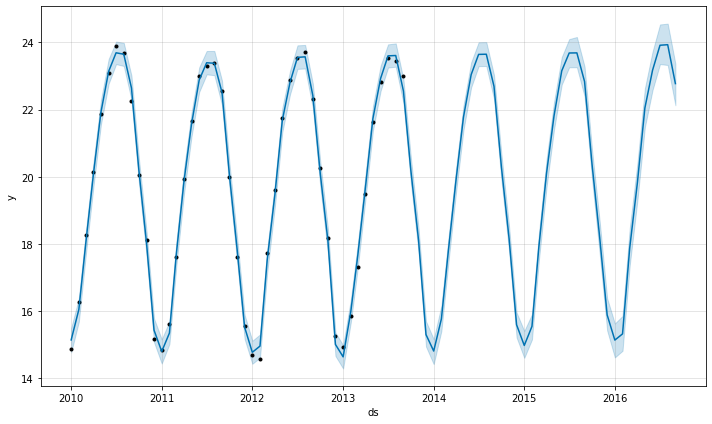

In [25]:
mi_modelo.plot(prediccion,
               uncertainty=True);

Se puede confirmar la tendencia que es creciente desde el 2012, asi como anualmente las mayores temperaturas se encuentran de marzo hasta agosto y empiezan a disminuir de septiembre a enero

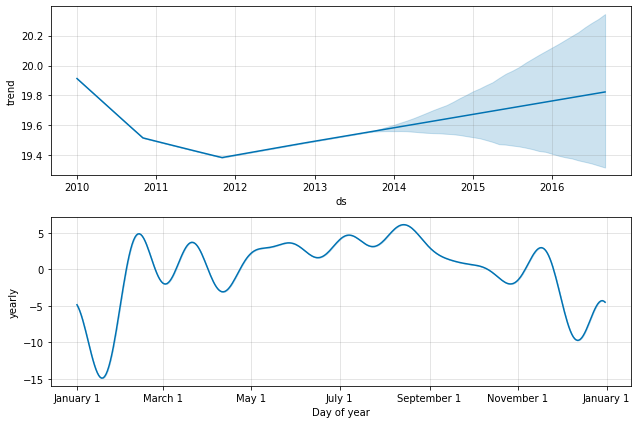

In [26]:
mi_modelo.plot_components(prediccion);

### 3. Haga una predicción de los valores de la serie para los últimos 3 años. Explique qué tan buena es su predicción.

### 4. Haga una predicción, tres años al futuro, usando los años anteriores y determine qué tan apegada es a la realidad teniendo en cuenta los meses pasados del año actual.

### 5. Basado en los resultados obtenidos, diría Ud que hay evidencia para corroborar la tan discutida aseveración de que el Cambio Climático y el Calentamiento Global es real

### 6. Repita los 5 pasos anteriores pero esta vez solo utilizando los datos para Guatemala.

In [19]:
gt = df['Country'] == 'Guatemala'
gua = df[gt]

In [28]:
gua.isnull().sum()

AverageTemperature               39
AverageTemperatureUncertainty    39
Country                           0
dtype: int64

### a. Especifique Inicio, fin, y frecuencia. 


### b. Haga un gráfico de la serie y explique qué información puede obtener a primera vista.


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

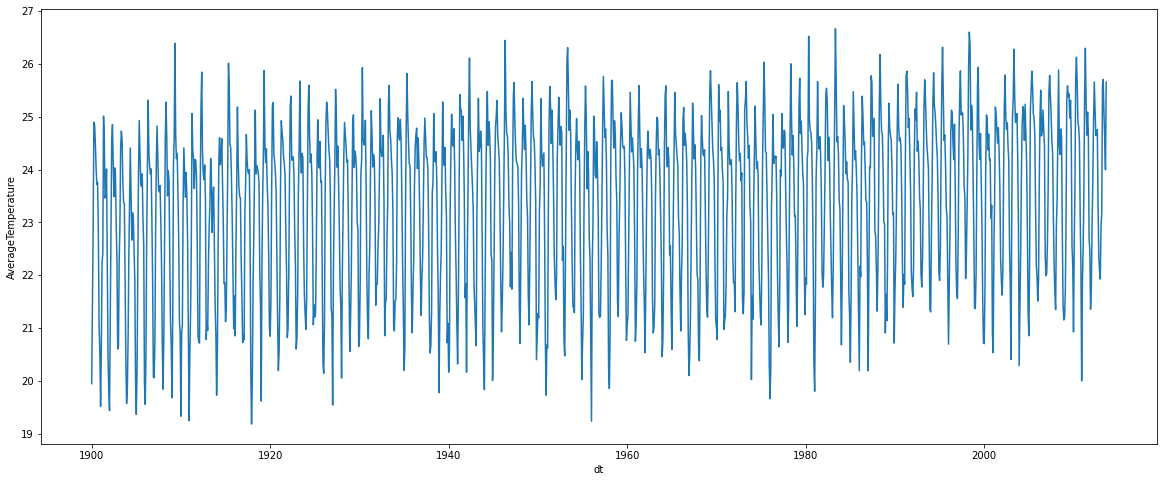

In [20]:


gt = temp2['Country'] == 'Guatemala'
tempGt = temp2[gt]


# Ultimos 100 años


plt.figure(figsize = (20,8))
sns.lineplot(x = 'dt', y = 'AverageTemperature',data = tempGt)

### c. Descomponga la serie en sus componentes. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionalidad. 


Se descompone la serie en sus somponentes y al analizar la grafica se puede ver una tendencia estacional, asi como un incremento de la temperatura en los ultimos años.


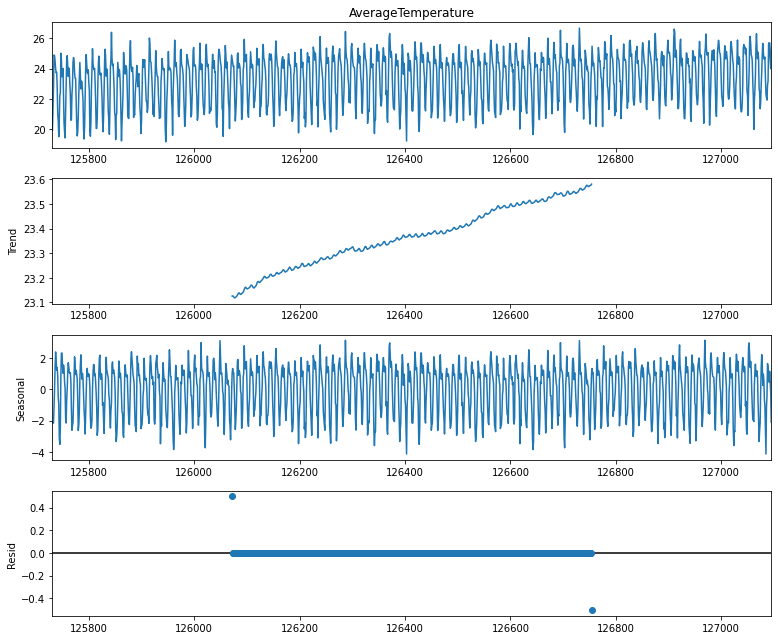

In [21]:
tempGt2 = tempGt

rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(tempGt2['AverageTemperature'],model='additive', period=682)
                                                  
fig = decomposition.plot()


### d. Determine si es necesario transformar la serie. Explique. 


### e. Una   vez   analizada   la   serie,   elija   los  parámetros   p,   q   y   d   del   modelo   ARIMA   o SARIMA 


### f. Haga varios modelos SARIMA, y diga cuál es el mejor de ellos para estimar los datos de la serie. 


### g. Haga un modelo usando el algoritmo Prophet de Facebook. Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

In [20]:
temp


dt  AverageTemperature   Country
0      1900-01-01              -3.026     Åland
1      1900-02-01              -8.063     Åland
2      1900-03-01              -3.196     Åland
3      1900-04-01               0.781     Åland
4      1900-05-01               4.960     Åland
...           ...                 ...       ...
329862 2013-04-01              21.142  Zimbabwe
329863 2013-05-01              19.059  Zimbabwe
329864 2013-06-01              17.613  Zimbabwe
329865 2013-07-01              17.000  Zimbabwe
329866 2013-08-01              19.759  Zimbabwe

[328818 rows x 3 columns]

In [ ]:
prueba

In [ ]:
prueba.plot(figsize=(16,10))

In [22]:
temp2

dt  AverageTemperature   Country
0      1900-01-01              -3.026     Åland
1      1900-02-01              -8.063     Åland
2      1900-03-01              -3.196     Åland
3      1900-04-01               0.781     Åland
4      1900-05-01               4.960     Åland
...           ...                 ...       ...
329863 2013-05-01              19.059  Zimbabwe
329864 2013-06-01              17.613  Zimbabwe
329865 2013-07-01              17.000  Zimbabwe
329866 2013-08-01              19.759  Zimbabwe
329867 2013-09-01                 NaN  Zimbabwe

[329868 rows x 3 columns]

In [121]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(temp1['AverageTemperature'], model='additive')
fig = decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [ ]:
temp3 = temp1.loc['2010-01-01':].reset_index(drop=False)

In [15]:
temp1

dt  AverageTemperature   Country
0     2000-01-01               0.197     Åland
1     2000-02-01              -0.023     Åland
2     2000-03-01               0.615     Åland
3     2000-04-01               4.124     Åland
4     2000-05-01               8.557     Åland
...          ...                 ...       ...
40090 2013-05-01              19.059  Zimbabwe
40091 2013-06-01              17.613  Zimbabwe
40092 2013-07-01              17.000  Zimbabwe
40093 2013-08-01              19.759  Zimbabwe
40094 2013-09-01                 NaN  Zimbabwe

[40095 rows x 3 columns]

# Guatemala








### 1. Haga un análisis exploratorio de los datos que se le presentan (AverageTemperature), se sugiere explorar el comportamiento de la variable y si está distribuidas normalmente, en caso de ser continuas. Meses en los que más/menos  temperatura  hay, comportamiento en los últimos x años,  etc.

In [22]:
df_Guatemala = pd.read_csv("GlobalLandTemperaturesByCountry.csv", index_col=0)
df_Guatemala = df_Guatemala[df_Guatemala['Country'] == 'Guatemala']
df_Guatemala

AverageTemperature  AverageTemperatureUncertainty    Country
dt                                                                      
1825-01-01              21.204                          1.770  Guatemala
1825-02-01              21.584                          1.374  Guatemala
1825-03-01              23.038                          1.704  Guatemala
1825-04-01              25.276                          1.923  Guatemala
1825-05-01              24.995                          1.276  Guatemala
...                        ...                            ...        ...
2013-05-01              25.704                          0.461  Guatemala
2013-06-01              25.048                          0.403  Guatemala
2013-07-01              24.588                          0.316  Guatemala
2013-08-01              23.996                          0.496  Guatemala
2013-09-01              25.655                          1.199  Guatemala

[2265 rows x 3 columns]

Se observan los tipos de datos que hay en el dataframe

In [17]:
df_Guatemala.head()

AverageTemperature  AverageTemperatureUncertainty    Country
dt                                                                      
1825-01-01              21.204                          1.770  Guatemala
1825-02-01              21.584                          1.374  Guatemala
1825-03-01              23.038                          1.704  Guatemala
1825-04-01              25.276                          1.923  Guatemala
1825-05-01              24.995                          1.276  Guatemala

In [18]:
df_Guatemala.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2265 entries, 1825-01-01 to 2013-09-01
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AverageTemperature             2226 non-null   float64
 1   AverageTemperatureUncertainty  2226 non-null   float64
 2   Country                        2265 non-null   object 
dtypes: float64(2), object(1)
memory usage: 70.8+ KB


In [19]:
profile = ProfileReport(df_Guatemala)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Se observa la cantidad de datos vacios en el dataframe

In [20]:
df_Guatemala.isnull().sum()

AverageTemperature               39
AverageTemperatureUncertainty    39
Country                           0
dtype: int64

Se puede observar que los datos tienen una distribucion  sesgada a la derecha

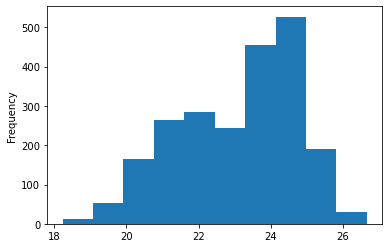

In [21]:
df_Guatemala['AverageTemperature'].plot.hist();


### 2. Haga una serie univariante por la variable AverageTemperature: 


### a. Especifique Inicio, fin, y frecuencia. 


Trabajaremos a partir del año **1900 hasta 2013**, con una frecuencia de 

<AxesSubplot:>

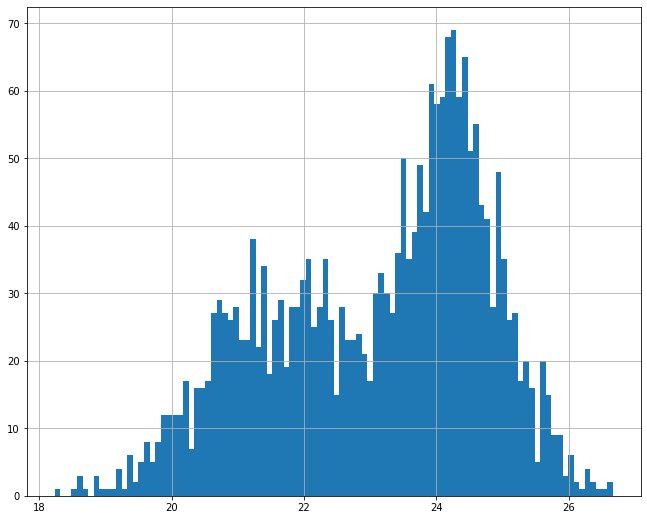

In [23]:
df_Guatemala['AverageTemperature'].hist(bins=100)

**Comentario.** La frecuencia es más mayor para valores entre 23 y 25. 

### b. Haga un gráfico de la serie y explique qué información puede obtener a primera vista.


##### Gráfica del año promedio mundial de temperatura, del año 2000 a septiembre de 2013

In [24]:
series_Gt = pd.read_csv('GlobalLandTemperaturesByCountry.csv', header=0, 
                     parse_dates = ["dt"], index_col = 0)
series_Gt = series_Gt[series_Gt['Country']=='Guatemala']
series_Gt

AverageTemperature  AverageTemperatureUncertainty    Country
dt                                                                      
1825-01-01              21.204                          1.770  Guatemala
1825-02-01              21.584                          1.374  Guatemala
1825-03-01              23.038                          1.704  Guatemala
1825-04-01              25.276                          1.923  Guatemala
1825-05-01              24.995                          1.276  Guatemala
...                        ...                            ...        ...
2013-05-01              25.704                          0.461  Guatemala
2013-06-01              25.048                          0.403  Guatemala
2013-07-01              24.588                          0.316  Guatemala
2013-08-01              23.996                          0.496  Guatemala
2013-09-01              25.655                          1.199  Guatemala

[2265 rows x 3 columns]

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

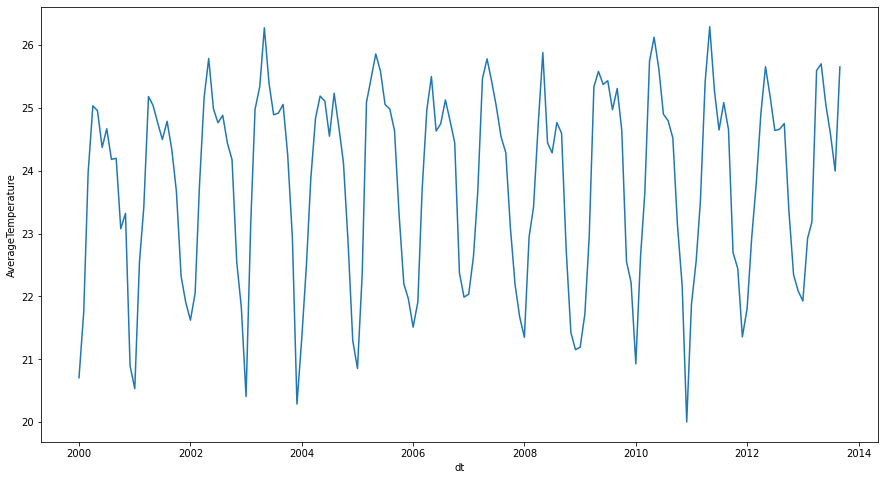

In [25]:
# Eliminamos la columna de AverageTemperatureUncertainty
temp = series_Gt.drop(['AverageTemperatureUncertainty'], axis=1)


temp1 = temp.loc['2000-01-01':].reset_index(drop=False)


plt.figure(figsize = (15,8))
sns.lineplot(x = 'dt', y = 'AverageTemperature',data = temp1)

**Conclusión.** La gráfica es estacional, puesto que cada fin y comienzo de año la temperatura es la más baja y aproximadamente luego de medio año julio/agosto se observan las temperaturas más altas. No muestra una tendencia constante, en estos últimos 13 años, la temperatura se mantiene constante a lo largo del tiempo.

#### Gráfico de los últimos 100 años

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

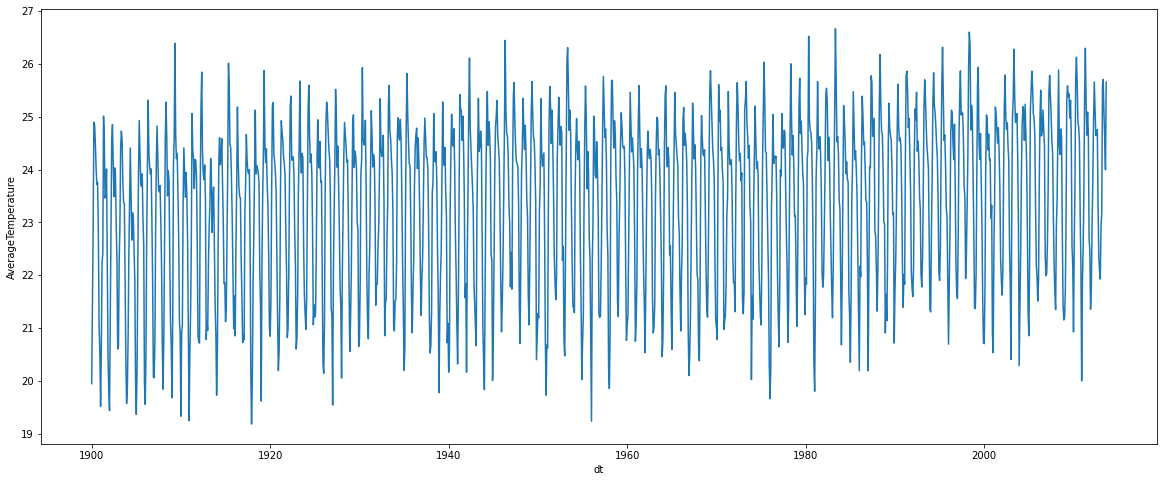

In [26]:
# Ultimos 100 años

temp2 = temp.loc['1900-01-01':].reset_index(drop=False)


plt.figure(figsize = (20,8))
sns.lineplot(x = 'dt', y = 'AverageTemperature',data = temp2)

**Comentario.** En los últimos 100 años la tendencia se mantiene constante, no parece incrementar ni descender la temperatura, aunque a partir de 1980 parace haber una leve tendencia de aumento hasta 2013

### c. Descomponga la serie en sus componentes. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionalidad. 


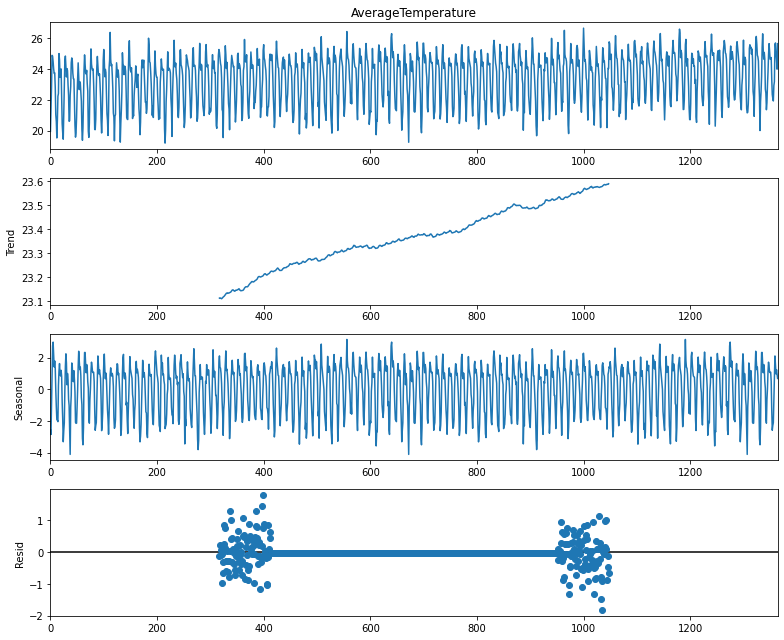

"\n#https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/\n\n# Ejemplo de descomposición de serie de tiempo\n\ndescomposicion = sm.tsa.seasonal_decompose(temp['AverageTemperature'],\n                                                  model='additive', freq=12)  \n\nfigure = descomposicion.plot(figsize=(10, 8))\nplt.figure(figsize=(10, 8))\n"

In [27]:
# https://soloelectronicos.com/2021/06/27/visualizacion-de-series-temporales-con-python-3/
#period=164409
temp = temp2
temp = temp.dropna()

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

#Se cmabio el numero de periodo por la cantidad de observaciones existenes para Guatemlaa
decomposition = sm.tsa.seasonal_decompose(temp['AverageTemperature'],model='additive', period=635)
                                                  
fig = decomposition.plot()
plt.show()

"""
#https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/

# Ejemplo de descomposición de serie de tiempo

descomposicion = sm.tsa.seasonal_decompose(temp['AverageTemperature'],
                                                  model='additive', freq=12)  

figure = descomposicion.plot(figsize=(10, 8))
plt.figure(figsize=(10, 8))
"""

**Comentario.** 

Observando la **tendencia**, vemos que en los últimos años, se tiene un ligero aumento, pero no es muy grande

**Estacionalidad.** Vemos que la gráfica repite un ciclo cada cierto tiempo, tiene picos negativos marcados, luego regresa a oscilar al rededor de cero.

No se observa comportamiento muy aleatorio

### d. Determine si es necesario transformar la serie. Explique. 


No es necesario transformar los datos, ya que la serie no tuvo una tendencia que aumentara fuertemente y su varianza fue constante.

### e. Una   vez   analizada   la   serie,   elija   los  parámetros   p,   q   y   d   del   modelo   ARIMA   o SARIMA 


### f. Haga varios modelos SARIMA, y diga cuál es el mejor de ellos para estimar los datos de la serie. 


In [42]:
# division_entreno_prueba([1,2,3,4,5],2)

def division_entreno_prueba(datos, n_prueba):
    return datos[:-n_prueba], datos[-n_prueba:]

def medir_rmse(actual, predicho):
    return sqrt(mean_squared_error(actual, predicho))

**Predicción Sarima**

In [43]:
# validación "walk-forward" para datos univariados
def validacion_al_frente(datos, n_prueba, metodo, cfg):
    predicciones = []
    # dividir el conjunto de datos
    entreno, prueba = division_entreno_prueba(datos, n_prueba)
    # grabar la historia con el conjunto de datos de entrenamiento
    historia = [x for x in entreno]
    # pasar por cada incremento de tiempo en el conjunto de prueba
    for i in range(len(prueba)):
        # ajustar el modelo a los datos y predecir los datos históricos
        if metodo == "promedio":
            yhat = prediccion_promedio(historia, cfg)
        elif metodo == "sarima":
            yhat = prediccion_sarima(historia, cfg)
        elif metodo == "exp":
            yhat = prediccion_alisamiento_exp(historia, cfg)
        # agregar el dato predicho en la lista de preducciones
        predicciones.append(yhat)
        # agregar la observación a la historia para la siguiente iteración
        historia.append(prueba[i])
    # estimar el error de las predicciones
    error = medir_rmse(prueba, predicciones)
    return [error, predicciones]

In [44]:
def busqueda_malla(datos, lista_cfg, n_prueba, metodo = "sarima", paralelo = True):
    resultados = None
    if paralelo:
        # ejecutar las configuraciones en paralelo
        executor = Parallel(n_jobs = cpu_count(), backend = 'multiprocessing') 
        tareas = (delayed(calificar_modelo)(datos, n_prueba, metodo, cfg) for cfg in lista_cfg) 
        resultados = executor(tareas)
    else:
        resultados = [calificar_modelo(datos, n_prueba, metodo, cfg) for cfg in lista_cfg]
    # eliminar resultados vacíos
    resultados = [r for r in resultados if r[1] != None]
    return resultados

In [45]:
def prediccion_sarima(historia, config):
    orden, orden_estacional, tendencia = config
    # definir el modelo
    modelo = SARIMAX(historia, order = orden, seasonal_order = orden_estacional, trend = tendencia,
      enforce_stationarity = False, enforce_invertibility = False)
    # ajustar el model con los datos
    modelo_ajustado = modelo.fit(disp = False)
    # hacer la predicción de un paso
    yhat = modelo_ajustado.predict(len(historia), len(historia))
    return yhat[0]

def config_sarima(estacional = [0]):
    modelos = []
    # definir las listas de configuración
    p_params = [0, 1, 2]
    d_params = [0, 1]
    q_params = [0, 1, 2]
    t_params = ['n','c','t','ct'] 
    P_params = [0, 1, 2]
    D_params = [0, 1]
    Q_params = [0, 1, 2]
    m_params = estacional
    # crear instancias de configuración
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    modelos.append(cfg)
    return modelos

In [46]:
def calificar_modelo(datos, n_prueba, metodo, cfg, debug = False):
    resultado = None
    predicciones = None
    # convertir la confiuración a una llave
    llave = str(cfg)
    if debug:
        resultado, predicciones = validacion_al_frente(datos, n_prueba, metodo, cfg)
    else:
        # una falla durante la validación del modelo sugiere una configuración inestable
        try:
        # nunca mostrar advertencias cuando se busca en malla...demasiado "ruido"
            with catch_warnings():
                filterwarnings("ignore")
                resultado, predicciones = validacion_al_frente(datos, n_prueba, metodo, cfg)
        except:
            error = None
    if resultado is not None:
        print(f' > Modelo{llave} {resultado:.3f}')
    return (llave, resultado, predicciones)

In [47]:
def encontrar_mejor_solucion(series, nombre, metodo = "sarima", muestra = False):
    datos = series.values
    resultados = []
    # dividir los datos
    
    #--------------------------------- Cambio de n_prueba, 
    # ---------------3 años
    n_prueba = 3 # porcenta usado para prueba
    long_max = len(datos) - n_prueba
    print(f"Tamaño Entrenamiento {long_max}")
    print(f"Tamaño Prueba {n_prueba}")
    
    #------------------------------------------------
    
    
    
    # configuraciones de los modelos
    if metodo == "sarima":
        print(f"Encontrando la mejor solución para {metodo}")
        lista_cfg = config_sarima()
    elif metodo == "promedio":
        print(f"Encontrando la mejor solución para {metodo}")
        lista_cfg = config_simple(long_max)
    elif metodo == "exp":
        print(f"Encontrando la mejor solución para {metodo}")
        lista_cfg = config_alisamiento_exp()
        datos = datos[:,0]
    # muestrear algunos
    if muestra:
        lista_cfg_azar = random.sample(lista_cfg, k = 25)
        while len(resultados) < 5:
            lista_cfg_azar = random.sample(lista_cfg, k = 25)
            resultados += busqueda_malla(datos, lista_cfg_azar, n_prueba, metodo)
    else:
        # búsqueda en malla
              
        # Si se tiene capacidad de procesamiento paralelo, paralelo = True (default)
        paralelo = True
        resultados = busqueda_malla(datos, lista_cfg, n_prueba, metodo, paralelo)
        
    
    # ordenan las configuraciones por error, ascendente
    resultados.sort(key = lambda tup: tup[1])

    print('terminado')
    # listar las mejores 3 configuraciones
    for cfg, error, predicciones in resultados[:3]:
        print(cfg, error)

    # desplegar
    entreno, prueba = division_entreno_prueba(datos, n_prueba)
    prediccion = pd.DataFrame(list(entreno.flatten()) + resultados[0][2])
    ax = pd.DataFrame(datos).plot(label = "Original") # Datos originales
    prediccion.plot(ax = ax, alpha = .7, figsize = (14,7))
    # Esconder las líneas de malla de la gráfica
    # ax.grid(False)

    # Esconder las marcas en los ejes
    #ax.set_xticks([])
    #ax.set_yticks([])
    
    plt.savefig(f"{nombre}_{metodo}.png", transparent = True)
    plt.show()

In [28]:
temp3 = temp1.loc['2010-01-01':].reset_index(drop=False)
mundial = temp3.groupby(['dt']).mean()
mundial = mundial.loc['2010-01-01':].reset_index(drop=False)
sar = mundial[["dt","AverageTemperature"]]
sar = sar.groupby(["dt"]).mean()
sar

AverageTemperature
dt                            
2010-01-01              20.927
2010-02-01              22.634
2010-03-01              23.643
2010-04-01              25.747
2010-05-01              26.126
2010-06-01              25.626
2010-07-01              24.904
2010-08-01              24.797
2010-09-01              24.522
2010-10-01              23.146
2010-11-01              22.178
2010-12-01              20.001
2011-01-01              21.872
2011-02-01              22.565
2011-03-01              23.530
2011-04-01              25.419
2011-05-01              26.295
2011-06-01              25.274
2011-07-01              24.650
2011-08-01              25.087
2011-09-01              24.659
2011-10-01              22.699
2011-11-01              22.444
2011-12-01              21.356
2012-01-01              21.803
2012-02-01              22.957
2012-03-01              23.793
2012-04-01              24.924
2012-05-01              25.657
2012-06-01              25.170
2012-07-01              24.643
2012-08-01              24.662
2012-09-01              24.753
2012-10-01              23.381
2012-11-01              22.346
2012-12-01              22.089
2013-01-01              21.927
2013-02-01              22.927
2013-03-01              23.181
2013-04-01              25.596
2013-05-01              25.704
2013-06-01              25.048
2013-07-01              24.588
2013-08-01              23.996
2013-09-01              25.655

In [29]:

##### SARIMA MODEL #####
#Run hyperparameter search on SARIMA model
order_combos, seasonal_order_combos = sarima_parameter_search(search_range = 2)
#Split the data into training and test sets (75/25 split)
training_set, test_set = time_series_train_test_split(time_series = sar, 
                                                        train_split_fraction = .75)
lowest_aic_val = 100000000000
#Generate  model for each of hyperparameter combination in a loop
for order_combo in order_combos:
    for seasonal_order_combo in seasonal_order_combos:
        #Convert the combination to list format
        seasonal_order_combo = list(seasonal_order_combo)
        #Generate the SARIMA model
        model_fit, model_aic, model_bic = seasonal_arima_model(time_series = training_set, 
                                                                order = order_combo, 
                                                                seasonal_order = seasonal_order_combo[0:4],
                                                                trend = seasonal_order_combo[-1])
        #Test model performance, and keep running tab of best performing model
        #Set with the newest value if the lowest_aic_value hasn't yet been calculated (on first run),
        #or if the newly calculated model AIC is lower than the lowest calculated AIC value
        if (model_aic < lowest_aic_val):
            lowest_aic_val = model_aic
            best_model = model_fit
            best_order = order_combo
            best_seasonal_order = seasonal_order_combo
#Print the best model parameters after the 
print("Best model paramaters: order-- ", best_order, ", seasonal order-- ", best_seasonal_order)  
print(best_model.summary())
#Run the data on the test set to gauge model performance
mean_predicted_values, confidence_interval_predicted_values = fit_predictions(best_model, 
                                                                                len(test_set), 
                                                                                test_set)


c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:                        SARIMAX   Log Likelihood                -151.721
Date:                Tue, 09 Aug 2022   AIC                            305.442
Time:                        10:43:22   BIC                            306.939
Sample:                    01-01-2010   HQIC                           305.946
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       576.7253   1626.196      0.355      0.723   -2610.559    3764.010
Ljung-Box (L1) (Q):                  19.96   Jarque-Bera (JB):                 2.12
Prob(Q):                              0.00   Pr

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All par

                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, [1], 12)   Log Likelihood                 -91.686
Date:                    Tue, 09 Aug 2022   AIC                            187.372
Time:                            10:43:22   BIC                            189.461
Sample:                        01-01-2010   HQIC                           187.826
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       1.0000   5.23e+04   1.91e-05      1.000   -1.02e+05    1.02e+05
sigma2       205.3200   1.07e+07   1.91e-05      1.000    -2.1e+07     2.1e+07
Ljung-Box (L1) (Q): 

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, [1], 12)   Log Likelihood                 -66.273
Date:                    Tue, 09 Aug 2022   AIC                            138.545
Time:                            10:43:23   BIC                            141.679
Sample:                        01-01-2010   HQIC                           139.225
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          1.0215      0.045     22.554      0.000       0.933       1.110
ma.S.L12      -1.0001   1.29e+04  -7.73e-05      1.000   -2.54e+04    2.54e+04
sigma2        18.243

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                SARIMAX Results                                 
Dep. Variable:       AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                 -12.637
Date:                  Tue, 09 Aug 2022   AIC                             27.274
Time:                          10:43:23   BIC                             28.319
Sample:                      01-01-2010   HQIC                            27.501
                           - 10-01-2012                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1951      0.043      4.556      0.000       0.111       0.279
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 7.46
Prob(Q):                       

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                  -3.973
Date:                    Tue, 09 Aug 2022   AIC                             13.946
Time:                            10:43:24   BIC                             14.538
Sample:                        01-01-2010   HQIC                            12.669
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0020      0.004     -0.483      0.629      -0.010       0.006
ma.S.L12      -1.0003   3298.461     -0.000      1.000   -6465.865    6463.865
sigma2         0.094

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                  -3.813
Date:                    Tue, 09 Aug 2022   AIC                             15.626
Time:                            10:43:24   BIC                             16.415
Sample:                        01-01-2010   HQIC                            13.924
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.4458      0.805     -0.554      0.580      -2.024       1.132
drift          0.0157      0.033      0.475      0.635      -0.049       0.080
ma.S.L12      -1.001

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                SARIMAX Results                                 
Dep. Variable:       AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0, 12)   Log Likelihood                 -14.676
Date:                  Tue, 09 Aug 2022   AIC                             35.353
Time:                          10:43:24   BIC                             38.626
Sample:                      01-01-2010   HQIC                            36.124
                           - 10-01-2012                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0091      0.017      0.528      0.598      -0.025       0.043
ar.S.L12       0.9929      0.018     54.815      0.000       0.957       1.028
sigma2         0.2223      0.065    

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, [1], 12)   Log Likelihood                  -6.019
Date:                    Tue, 09 Aug 2022   AIC                             20.037
Time:                            10:43:25   BIC                             24.215
Sample:                        01-01-2010   HQIC                            20.944
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7551      0.872      5.451      0.000       3.045       6.465
ar.S.L12       0.8029      0.037     21.610      0.000       0.730       0.876
ma.S.L12      17.898

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few ob

                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, [1], 12)   Log Likelihood                 -12.044
Date:                    Tue, 09 Aug 2022   AIC                             32.088
Time:                            10:43:25   BIC                             36.266
Sample:                        01-01-2010   HQIC                            32.995
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0170      0.022      0.775      0.438      -0.026       0.060
ar.S.L12       0.9838      0.024     40.418      0.000       0.936       1.031
ma.S.L12      16.504

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData

                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, [1], 12)   Log Likelihood                  -6.136
Date:                    Tue, 09 Aug 2022   AIC                             22.272
Time:                            10:43:26   BIC                             27.494
Sample:                        01-01-2010   HQIC                            23.405
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7231      0.968      4.881      0.000       2.827       6.620
drift          0.0045      0.013      0.353      0.724      -0.021       0.030
ar.S.L12       0.800

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:       AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                  -4.386
Date:                  Tue, 09 Aug 2022   AIC                             14.772
Time:                          10:43:26   BIC                             15.680
Sample:                      01-01-2010   HQIC                            13.776
                           - 10-01-2012                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0011      0.005     -0.231      0.817      -0.010       0.008
ar.S.L12      -0.2892      0.404     -0.716      0.474      -1.081       0.502
sigma2         0.1408      0.111    

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, [1], 12)   Log Likelihood                  -3.819
Date:                    Tue, 09 Aug 2022   AIC                             15.639
Time:                            10:43:27   BIC                             16.428
Sample:                        01-01-2010   HQIC                            13.936
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1068      2.725     -0.039      0.969      -5.448       5.235
ar.S.L12      -0.7481      0.701     -1.067      0.286      -2.123       0.626
ma.S.L12      -0.036

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, [1], 12)   Log Likelihood                  -3.860
Date:                    Tue, 09 Aug 2022   AIC                             15.720
Time:                            10:43:27   BIC                             16.509
Sample:                        01-01-2010   HQIC                            14.017
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0034      0.006     -0.587      0.557      -0.015       0.008
ar.S.L12      -0.7364      0.568     -1.297      0.195      -1.849       0.376
ma.S.L12      -0.136

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                 SARIMAX Results                                  
Dep. Variable:         AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, [1], 12)   Log Likelihood                  -3.687
Date:                    Tue, 09 Aug 2022   AIC                             17.375
Time:                            10:43:28   BIC                             18.361
Sample:                        01-01-2010   HQIC                            15.247
                             - 10-01-2012                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.7989      1.353     -0.590      0.555      -3.451       1.853
drift          0.0238      0.049      0.482      0.630      -0.073       0.121
ar.S.L12      -0.757

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 -75.288
Date:                            Tue, 09 Aug 2022   AIC                            156.575
Time:                                    10:43:28   BIC                            159.562
Sample:                                01-01-2010   HQIC                           157.158
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0000   7275.951      0.000      1.000   -1.43e+04    1.43e+04
ma.S.L12       1.0000   3.33e+04   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 -52.680
Date:                            Tue, 09 Aug 2022   AIC                            113.360
Time:                                    10:43:28   BIC                            117.343
Sample:                                01-01-2010   HQIC                           114.137
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.9968      0.057     17.366      0.000       0.884       1.109
ma.L1          1.0000   3994.185   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 -23.490
Date:                            Tue, 09 Aug 2022   AIC                             56.979
Time:                                    10:43:29   BIC                             61.958
Sample:                                01-01-2010   HQIC                            57.951
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     24.1598      1.824     13.245      0.000      20.585      27.735
drift         -0.0090      0.087   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 1, [], 12)   Log Likelihood                 -12.155
Date:                             Tue, 09 Aug 2022   AIC                             30.311
Time:                                     10:43:29   BIC                             33.298
Sample:                                 01-01-2010   HQIC                            30.894
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0018      0.006      0.310      0.757      -0.010       0.013
ma.L1          0.2771      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 1, [], 12)   Log Likelihood                 -12.110
Date:                             Tue, 09 Aug 2022   AIC                             32.221
Time:                                     10:43:29   BIC                             36.204
Sample:                                 01-01-2010   HQIC                            32.998
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1583      0.776     -0.204      0.838      -1.679       1.362
drift          0.0081      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                  -0.297
Date:                            Tue, 09 Aug 2022   AIC                              8.595
Time:                                    10:43:30   BIC                              8.913
Sample:                                01-01-2010   HQIC                             6.452
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1281      0.137     -0.935      0.350      -0.397       0.140
ma.L1          0.7170      0.136   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                  -0.556
Date:                            Tue, 09 Aug 2022   AIC                              9.112
Time:                                    10:43:30   BIC                              9.430
Sample:                                01-01-2010   HQIC                             6.969
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0040      0.005     -0.779      0.436      -0.014       0.006
ma.L1          0.7104      0.136   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                   2.597
Date:                            Tue, 09 Aug 2022   AIC                              4.805
Time:                                    10:43:31   BIC                              5.203
Sample:                                01-01-2010   HQIC                             2.126
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.4262      1.190     -2.038      0.042      -4.759      -0.093
drift          0.0835      0.041   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 0, [], 12)   Log Likelihood                  -6.251
Date:                             Tue, 09 Aug 2022   AIC                             20.502
Time:                                     10:43:31   BIC                             24.866
Sample:                                 01-01-2010   HQIC                            21.530
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.3180      1.030      5.165      0.000       3.300       7.336
ma.L1         11.2715     4

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 0, [], 12)   Log Likelihood                 -14.837
Date:                             Tue, 09 Aug 2022   AIC                             37.674
Time:                                     10:43:32   BIC                             42.038
Sample:                                 01-01-2010   HQIC                            38.702
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0085      0.017      0.508      0.611      -0.024       0.041
ma.L1        -13.1927     8

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 -11.925
Date:                            Tue, 09 Aug 2022   AIC                             31.850
Time:                                    10:43:32   BIC                             35.833
Sample:                                01-01-2010   HQIC                            32.627
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1        -19.3491    193.850     -0.100      0.920    -399.289     360.591
ar.S.L12       0.9982      0.005   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 -10.352
Date:                            Tue, 09 Aug 2022   AIC                             30.704
Time:                                    10:43:33   BIC                             35.683
Sample:                                01-01-2010   HQIC                            31.676
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0286      0.025      1.139      0.255      -0.021       0.078
ma.L1        -15.9995    121.869   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  -3.566
Date:                            Tue, 09 Aug 2022   AIC                             19.131
Time:                                    10:43:34   BIC                             25.106
Sample:                                01-01-2010   HQIC                            20.297
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.0382      0.307     13.155      0.000       3.437       4.640
drift         -0.0072      0.002   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                  -1.937
Date:                             Tue, 09 Aug 2022   AIC                             11.874
Time:                                     10:43:34   BIC                             13.084
Sample:                                 01-01-2010   HQIC                            10.546
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift       7.042e-05      0.008      0.009      0.993      -0.015       0.015
ma.L1          1.0000   243

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                  -1.854
Date:                             Tue, 09 Aug 2022   AIC                             13.707
Time:                                     10:43:35   BIC                             15.220
Sample:                                 01-01-2010   HQIC                            12.048
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.6372      2.264     -0.281      0.778      -5.075       3.801
drift          0.0222      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood                  -1.474
Date:                            Tue, 09 Aug 2022   AIC                             12.949
Time:                                    10:43:35   BIC                             13.346
Sample:                                01-01-2010   HQIC                            10.270
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0723      1.221     -0.059      0.953      -2.466       2.322
ma.L1          1.0000   1.28e+04   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood                  -0.424
Date:                            Tue, 09 Aug 2022   AIC                             10.848
Time:                                    10:43:36   BIC                             11.245
Sample:                                01-01-2010   HQIC                             8.169
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0038      0.005     -0.713      0.476      -0.014       0.007
ma.L1          1.2889      0.684   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood                   0.974
Date:                            Tue, 09 Aug 2022   AIC                             10.052
Time:                                    10:43:37   BIC                             10.529
Sample:                                01-01-2010   HQIC                             6.838
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.4584      1.243     -1.174      0.241      -3.894       0.977
drift          0.0521      0.044   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -47.392
Date:                Tue, 09 Aug 2022   AIC                            100.784
Time:                        10:43:37   BIC                            105.181
Sample:                    01-01-2010   HQIC                           102.241
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2269      0.402      0.565      0.572      -0.561       1.015
drift         -0.0116      0.024     -0.494      0.621      -0.058       0.035
sigma2         1.1321      0.353      3.205      0.0

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                 -23.496
Date:                              Tue, 09 Aug 2022   AIC                             54.993
Time:                                      10:43:37   BIC                             58.975
Sample:                                  01-01-2010   HQIC                            55.770
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1266      0.783      0.162      0.872      -1.409       1.662
drift         -0.00

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                  -3.709
Date:                              Tue, 09 Aug 2022   AIC                             11.418
Time:                                      10:43:38   BIC                             11.577
Sample:                                  01-01-2010   HQIC                            10.346
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9999   8752.035     -0.000      1.000   -1.72e+04    1.72e+04
sigma2         0.09

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                  -3.678
Date:                              Tue, 09 Aug 2022   AIC                             13.355
Time:                                      10:43:38   BIC                             13.593
Sample:                                  01-01-2010   HQIC                            11.748
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0009      0.007      0.135      0.893      -0.012       0.014
ma.S.L12      -1.00

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                  -1.737
Date:                              Tue, 09 Aug 2022   AIC                             11.473
Time:                                      10:43:39   BIC                             11.791
Sample:                                  01-01-2010   HQIC                             9.330
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.7547      1.345     -1.304      0.192      -4.392       0.882
drift          0.06

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                 -13.733
Date:                            Tue, 09 Aug 2022   AIC                             33.467
Time:                                    10:43:39   BIC                             36.600
Sample:                                01-01-2010   HQIC                            34.147
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0007      0.006      0.131      0.896      -0.010       0.012
ar.S.L12       0.6761      0.083   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                 -13.730
Date:                            Tue, 09 Aug 2022   AIC                             35.459
Time:                                    10:43:39   BIC                             39.638
Sample:                                01-01-2010   HQIC                            36.366
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0336      0.495     -0.068      0.946      -1.003       0.936
drift          0.0021      0.023   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 -11.462
Date:                              Tue, 09 Aug 2022   AIC                             30.925
Time:                                      10:43:39   BIC                             34.908
Sample:                                  01-01-2010   HQIC                            31.702
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0207      0.106      0.195      0.846      -0.187       0.229
ar.S.L12       0.78

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 -11.486
Date:                              Tue, 09 Aug 2022   AIC                             30.972
Time:                                      10:43:40   BIC                             34.955
Sample:                                  01-01-2010   HQIC                            31.749
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0005      0.005      0.117      0.907      -0.008       0.010
ar.S.L12       0.78

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                  -3.609
Date:                            Tue, 09 Aug 2022   AIC                             13.217
Time:                                    10:43:40   BIC                             13.809
Sample:                                01-01-2010   HQIC                            11.940
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0051      0.231     -0.022      0.983      -0.457       0.447
ar.S.L12      -0.5722      0.627   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                  -1.699
Date:                            Tue, 09 Aug 2022   AIC                             11.398
Time:                                    10:43:41   BIC                             12.187
Sample:                                01-01-2010   HQIC                             9.696
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.4561      2.636     -0.932      0.351      -7.623       2.710
drift          0.0840      0.089   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                  -3.594
Date:                              Tue, 09 Aug 2022   AIC                             15.188
Time:                                      10:43:41   BIC                             15.506
Sample:                                  01-01-2010   HQIC                            13.045
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0049      0.276      0.018      0.986      -0.536       0.545
ar.S.L12      -0.66

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                  -1.722
Date:                              Tue, 09 Aug 2022   AIC                             13.443
Time:                                      10:43:42   BIC                             13.840
Sample:                                  01-01-2010   HQIC                            10.764
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.0055      2.484     -1.210      0.226      -7.875       1.863
drift          0.10

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 -44.308
Date:                Tue, 09 Aug 2022   AIC                             96.616
Time:                        10:43:42   BIC                            102.352
Sample:                    01-01-2010   HQIC                            98.486
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0765      0.610      0.125      0.900      -1.119       1.272
drift         -0.0063      0.034     -0.186      0.852      -0.072       0.060
ma.L1          0.3250      0.176      1.843      0.0

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 -20.768
Date:                            Tue, 09 Aug 2022   AIC                             49.536
Time:                                    10:43:42   BIC                             53.314
Sample:                                01-01-2010   HQIC                            50.176
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0899      0.276     -0.326      0.745      -0.631       0.452
ma.L1          0.4433      0.181   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 -20.776
Date:                            Tue, 09 Aug 2022   AIC                             49.551
Time:                                    10:43:42   BIC                             53.329
Sample:                                01-01-2010   HQIC                            50.191
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0031      0.013     -0.233      0.815      -0.029       0.023
ma.L1          0.4425      0.183   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 -20.768
Date:                            Tue, 09 Aug 2022   AIC                             51.536
Time:                                    10:43:43   BIC                             56.258
Sample:                                01-01-2010   HQIC                            52.335
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1069      1.315     -0.081      0.935      -2.684       2.470
drift          0.0007      0.062   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 -13.592
Date:                             Tue, 09 Aug 2022   AIC                             33.183
Time:                                     10:43:43   BIC                             36.017
Sample:                                 01-01-2010   HQIC                            33.663
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0001      0.001     -0.181      0.856      -0.002       0.001
ma.L1         -0.9998    13

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 -13.558
Date:                             Tue, 09 Aug 2022   AIC                             35.117
Time:                                     10:43:43   BIC                             38.895
Sample:                                 01-01-2010   HQIC                            35.756
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0273      0.177     -0.154      0.877      -0.374       0.319
drift          0.0010      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                   0.255
Date:                            Tue, 09 Aug 2022   AIC                              5.490
Time:                                    10:43:43   BIC                              5.328
Sample:                                01-01-2010   HQIC                             3.484
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7451      0.262      2.849      0.004       0.233       1.258
ma.S.L12      -1.0002   3999.147   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                   0.851
Date:                            Tue, 09 Aug 2022   AIC                              6.298
Time:                                    10:43:44   BIC                              6.082
Sample:                                01-01-2010   HQIC                             3.624
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1080      0.203      0.532      0.595      -0.290       0.506
ma.L1          0.7504      0.205   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                   0.849
Date:                            Tue, 09 Aug 2022   AIC                              6.301
Time:                                    10:43:44   BIC                              6.085
Sample:                                01-01-2010   HQIC                             3.627
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0041      0.007      0.576      0.565      -0.010       0.018
ma.L1          0.7500      0.202   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                   2.578
Date:                            Tue, 09 Aug 2022   AIC                              4.845
Time:                                    10:43:45   BIC                              4.574
Sample:                                01-01-2010   HQIC                             1.502
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.2131      1.188     -1.021      0.307      -3.541       1.115
drift          0.0484      0.046   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                  -7.635
Date:                             Tue, 09 Aug 2022   AIC                             23.271
Time:                                     10:43:45   BIC                             27.449
Sample:                                 01-01-2010   HQIC                            24.178
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0001      0.001      0.174      0.862      -0.001       0.002
ma.L1         -1.0001    74

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few ob

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                  -7.377
Date:                             Tue, 09 Aug 2022   AIC                             24.755
Time:                                     10:43:46   BIC                             29.977
Sample:                                 01-01-2010   HQIC                            25.888
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0568      0.129     -0.440      0.660      -0.309       0.196
drift          0.0026      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  -5.047
Date:                            Tue, 09 Aug 2022   AIC                             20.094
Time:                                    10:43:46   BIC                             24.816
Sample:                                01-01-2010   HQIC                            20.893
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0087      0.018      0.483      0.629      -0.027       0.044
ma.L1         -1.0000   8898.452   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  -5.049
Date:                            Tue, 09 Aug 2022   AIC                             20.098
Time:                                    10:43:47   BIC                             24.820
Sample:                                01-01-2010   HQIC                            20.897
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0004      0.001      0.426      0.670      -0.001       0.002
ma.L1         -1.0001   1170.141   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  -8.827
Date:                            Tue, 09 Aug 2022   AIC                             29.654
Time:                                    10:43:47   BIC                             35.320
Sample:                                01-01-2010   HQIC                            30.613
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0461      0.147     -0.315      0.753      -0.333       0.241
drift          0.0022      0.006   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                  -3.510
Date:                             Tue, 09 Aug 2022   AIC                             15.020
Time:                                     10:43:47   BIC                             15.809
Sample:                                 01-01-2010   HQIC                            13.318
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0008      0.010      0.081      0.935      -0.018       0.020
ma.L1          0.1646      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                  -0.205
Date:                             Tue, 09 Aug 2022   AIC                             10.411
Time:                                     10:43:48   BIC                             11.397
Sample:                                 01-01-2010   HQIC                             8.283
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.8634      1.429     -2.004      0.045      -5.664      -0.063
drift          0.0973      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  -3.462
Date:                            Tue, 09 Aug 2022   AIC                             16.924
Time:                                    10:43:49   BIC                             16.654
Sample:                                01-01-2010   HQIC                            13.582
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0017      0.014      0.124      0.902      -0.026       0.029
ma.L1          0.1041      1.171   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   1.275
Date:                            Tue, 09 Aug 2022   AIC                              9.450
Time:                                    10:43:49   BIC                              9.126
Sample:                                01-01-2010   HQIC                             5.439
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.0298      1.369     -2.213      0.027      -5.713      -0.346
drift          0.1039      0.048   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -46.264
Date:                Tue, 09 Aug 2022   AIC                            100.527
Time:                        10:43:50   BIC                            106.513
Sample:                    01-01-2010   HQIC                           102.541
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.8951      3.891      1.772      0.076      -0.730      14.521
drift         -0.0142      0.022     -0.632      0.527      -0.058       0.030
ar.L1          0.7246      0.168      4.326      0.0

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                 -23.055
Date:                              Tue, 09 Aug 2022   AIC                             54.110
Time:                                      10:43:50   BIC                             58.288
Sample:                                  01-01-2010   HQIC                            55.017
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.0072      3.771      1.593      0.111      -1.384      13.398
ar.L1          0.75

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                 -22.989
Date:                              Tue, 09 Aug 2022   AIC                             55.979
Time:                                      10:43:50   BIC                             61.201
Sample:                                  01-01-2010   HQIC                            57.112
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.1054      4.223      1.446      0.148      -2.172      14.383
drift         -0.00

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                 -12.409
Date:                            Tue, 09 Aug 2022   AIC                             32.817
Time:                                    10:43:51   BIC                             36.995
Sample:                                01-01-2010   HQIC                            33.724
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1822      0.613     -0.297      0.766      -1.383       1.018
drift          0.0085      0.024   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                  -2.517
Date:                              Tue, 09 Aug 2022   AIC                             13.033
Time:                                      10:43:51   BIC                             13.822
Sample:                                  01-01-2010   HQIC                            11.331
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0228      0.130     -0.175      0.861      -0.278       0.233
ar.L1          0.53

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                  -2.550
Date:                              Tue, 09 Aug 2022   AIC                             13.100
Time:                                      10:43:51   BIC                             13.889
Sample:                                  01-01-2010   HQIC                            11.397
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0005      0.005     -0.098      0.922      -0.011       0.010
ar.L1          0.53

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                  -1.470
Date:                              Tue, 09 Aug 2022   AIC                             12.941
Time:                                      10:43:52   BIC                             13.927
Sample:                                  01-01-2010   HQIC                            10.813
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0149      1.412     -0.719      0.472      -3.782       1.752
drift          0.04

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                  -5.145
Date:                            Tue, 09 Aug 2022   AIC                             18.291
Time:                                    10:43:52   BIC                             22.469
Sample:                                01-01-2010   HQIC                            19.198
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.4281      1.663      3.265      0.001       2.169       8.687
ar.L1         -0.2364      0.284   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                  -5.569
Date:                            Tue, 09 Aug 2022   AIC                             21.138
Time:                                    10:43:53   BIC                             26.360
Sample:                                01-01-2010   HQIC                            22.271
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.6948      1.482      4.517      0.000       3.790       9.600
drift          0.0037      0.013   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                 -11.335
Date:                              Tue, 09 Aug 2022   AIC                             30.671
Time:                                      10:43:53   BIC                             34.849
Sample:                                  01-01-2010   HQIC                            31.578
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1848      0.360      0.513      0.608      -0.521       0.890
ar.S.L12       0.99

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few ob

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                 -10.118
Date:                              Tue, 09 Aug 2022   AIC                             30.236
Time:                                      10:43:53   BIC                             35.458
Sample:                                  01-01-2010   HQIC                            31.369
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0287      0.025      1.140      0.254      -0.021       0.078
ar.L1          0.37

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                  -3.155
Date:                              Tue, 09 Aug 2022   AIC                             18.311
Time:                                      10:43:54   BIC                             24.578
Sample:                                  01-01-2010   HQIC                            19.671
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.5034      1.305      4.985      0.000       3.946       9.061
drift          0.00

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                  -2.186
Date:                            Tue, 09 Aug 2022   AIC                             12.371
Time:                                    10:43:54   BIC                             13.160
Sample:                                01-01-2010   HQIC                            10.669
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0021      0.013     -0.165      0.869      -0.027       0.023
ar.L1          0.4913      1.836   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                  -0.708
Date:                            Tue, 09 Aug 2022   AIC                             11.416
Time:                                    10:43:55   BIC                             12.402
Sample:                                01-01-2010   HQIC                             9.288
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9737      2.801     -0.705      0.481      -7.464       3.516
drift          0.0657      0.098   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood                  -1.920
Date:                              Tue, 09 Aug 2022   AIC                             13.839
Time:                                      10:43:55   BIC                             14.825
Sample:                                  01-01-2010   HQIC                            11.711
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0897      0.325     -0.276      0.782      -0.726       0.547
ar.L1          0.49

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood                  -2.029
Date:                              Tue, 09 Aug 2022   AIC                             14.058
Time:                                      10:43:56   BIC                             15.044
Sample:                                  01-01-2010   HQIC                            11.930
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0025      0.013     -0.192      0.848      -0.028       0.023
ar.L1          0.49

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -42.593
Date:                Tue, 09 Aug 2022   AIC                             93.186
Time:                        10:43:57   BIC                             99.049
Sample:                    01-01-2010   HQIC                            95.129
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.0182      4.473      2.016      0.044       0.251      17.786
ar.L1          0.6243      0.192      3.256      0.001       0.248       1.000
ma.L1          0.4147      0.229      1.813      0.0

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -42.464
Date:                Tue, 09 Aug 2022   AIC                             94.929
Time:                        10:43:57   BIC                            102.257
Sample:                    01-01-2010   HQIC                            97.358
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.0973      4.544      2.002      0.045       0.191      18.004
drift         -0.0121      0.032     -0.383      0.702      -0.074       0.050
ar.L1          0.6298      0.198      3.186      0.0

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 -20.028
Date:                            Tue, 09 Aug 2022   AIC                             50.055
Time:                                    10:43:57   BIC                             55.034
Sample:                                01-01-2010   HQIC                            51.027
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.4605      6.598      1.434      0.152      -3.471      22.392
ar.L1          0.6059      0.272   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 -19.954
Date:                            Tue, 09 Aug 2022   AIC                             51.908
Time:                                    10:43:58   BIC                             57.882
Sample:                                01-01-2010   HQIC                            53.074
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.6481      6.830      1.413      0.158      -3.738      23.034
drift         -0.0112      0.061   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 12)   Log Likelihood                 -11.387
Date:                             Tue, 09 Aug 2022   AIC                             30.775
Time:                                     10:43:58   BIC                             34.758
Sample:                                 01-01-2010   HQIC                            31.552
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0021      0.008      0.264      0.792      -0.014       0.018
ar.L1         -0.5115      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                  -1.038
Date:                            Tue, 09 Aug 2022   AIC                             10.076
Time:                                    10:43:58   BIC                             10.394
Sample:                                01-01-2010   HQIC                             7.933
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0039      0.525      0.007      0.994      -1.025       1.033
ma.L1          0.6973      0.315   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                  -0.534
Date:                            Tue, 09 Aug 2022   AIC                             11.068
Time:                                    10:43:59   BIC                             11.465
Sample:                                01-01-2010   HQIC                             8.389
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0043      0.006     -0.691      0.490      -0.016       0.008
ar.L1         -0.0709      0.636   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                   4.542
Date:                            Tue, 09 Aug 2022   AIC                              2.915
Time:                                    10:43:59   BIC                              3.392
Sample:                                01-01-2010   HQIC                            -0.300
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.3095      1.938     -1.708      0.088      -7.108       0.489
drift          0.1201      0.083   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                  -4.805
Date:                             Tue, 09 Aug 2022   AIC                             19.609
Time:                                     10:44:00   BIC                             24.832
Sample:                                 01-01-2010   HQIC                            20.743
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.0010      2.687      2.606      0.009       1.735      12.267
ar.L1         -0.4535      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                  -7.255
Date:                             Tue, 09 Aug 2022   AIC                             24.511
Time:                                     10:44:00   BIC                             29.734
Sample:                                 01-01-2010   HQIC                            25.644
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0031      0.006      0.500      0.617      -0.009       0.015
ar.L1          0.9862      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few ob

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                  -4.650
Date:                             Tue, 09 Aug 2022   AIC                             21.300
Time:                                     10:44:01   BIC                             27.567
Sample:                                 01-01-2010   HQIC                            22.660
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.6463      2.788      2.384      0.017       1.182      12.110
drift          0.0116      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  -2.921
Date:                            Tue, 09 Aug 2022   AIC                             17.842
Time:                                    10:44:02   BIC                             23.817
Sample:                                01-01-2010   HQIC                            19.009
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.6897      2.352      2.844      0.004       2.080      11.299
ar.L1         -0.5784      0.385   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few ob

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  -7.980
Date:                            Tue, 09 Aug 2022   AIC                             27.961
Time:                                    10:44:02   BIC                             33.935
Sample:                                01-01-2010   HQIC                            29.127
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0019      0.007      0.268      0.789      -0.012       0.016
ar.L1          0.9922      0.031   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                  -1.961
Date:                             Tue, 09 Aug 2022   AIC                             11.921
Time:                                     10:44:03   BIC                             12.710
Sample:                                 01-01-2010   HQIC                            10.219
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0729      1.193      0.061      0.951      -2.266       2.412
ma.L1          1.0000   593

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                  -1.958
Date:                             Tue, 09 Aug 2022   AIC                             13.917
Time:                                     10:44:03   BIC                             14.903
Sample:                                 01-01-2010   HQIC                            11.789
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0126      0.844     -0.015      0.988      -1.666       1.641
ar.L1          0.0679      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                  -1.961
Date:                             Tue, 09 Aug 2022   AIC                             13.921
Time:                                     10:44:04   BIC                             14.907
Sample:                                 01-01-2010   HQIC                            11.793
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift      -7.835e-05      0.022     -0.004      0.997      -0.043       0.043
ar.L1          0.0720      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                  -1.270
Date:                             Tue, 09 Aug 2022   AIC                             14.540
Time:                                     10:44:04   BIC                             15.724
Sample:                                 01-01-2010   HQIC                            11.987
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.8290      2.816     -0.650      0.516      -7.348       3.690
drift          0.0604      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                  -1.450
Date:                            Tue, 09 Aug 2022   AIC                             14.901
Time:                                    10:44:05   BIC                             15.378
Sample:                                01-01-2010   HQIC                            11.686
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0636      6.885     -0.009      0.993     -13.558      13.431
ar.L1          0.0822      4.117   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                  -0.928
Date:                            Tue, 09 Aug 2022   AIC                             13.855
Time:                                    10:44:05   BIC                             14.332
Sample:                                01-01-2010   HQIC                            10.641
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0023      0.012     -0.200      0.842      -0.025       0.020
ar.L1          0.1416      0.399   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                  -0.601
Date:                            Tue, 09 Aug 2022   AIC                             15.202
Time:                                    10:44:06   BIC                             15.758
Sample:                                01-01-2010   HQIC                            11.451
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1994      2.589     -0.077      0.939      -5.275       4.876
drift          0.0041      0.101   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(0, 0, [1], 12)   Log Likelihood                 -22.515
Date:                              Tue, 09 Aug 2022   AIC                             51.030
Time:                                      10:44:06   BIC                             54.018
Sample:                                  01-01-2010   HQIC                            51.614
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3052      0.260      1.175      0.240      -0.204       0.814
ma.S.L12       1.00

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -16.902
Date:                            Tue, 09 Aug 2022   AIC                             37.805
Time:                                    10:44:07   BIC                             39.796
Sample:                                01-01-2010   HQIC                            38.193
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2623      0.186     -1.411      0.158      -0.627       0.102
sigma2         0.3174      0.107  

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -16.842
Date:                            Tue, 09 Aug 2022   AIC                             39.683
Time:                                    10:44:07   BIC                             42.671
Sample:                                01-01-2010   HQIC                            40.266
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0018      0.006      0.297      0.766      -0.010       0.014
ar.L1         -0.2624      0.218   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                  -3.629
Date:                              Tue, 09 Aug 2022   AIC                             13.258
Time:                                      10:44:07   BIC                             13.497
Sample:                                  01-01-2010   HQIC                            11.651
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1459      0.665      0.220      0.826      -1.157       1.449
ma.S.L12      -1.00

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                  -3.593
Date:                              Tue, 09 Aug 2022   AIC                             15.186
Time:                                      10:44:08   BIC                             15.504
Sample:                                  01-01-2010   HQIC                            13.043
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0009      0.007      0.144      0.886      -0.012       0.014
ar.L1          0.14

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                  -1.542
Date:                              Tue, 09 Aug 2022   AIC                             13.083
Time:                                      10:44:08   BIC                             13.481
Sample:                                  01-01-2010   HQIC                            10.404
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9963      1.309     -1.525      0.127      -4.562       0.569
drift          0.07

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                 -11.956
Date:                            Tue, 09 Aug 2022   AIC                             31.913
Time:                                    10:44:09   BIC                             35.895
Sample:                                01-01-2010   HQIC                            32.690
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0016      0.006      0.276      0.782      -0.010       0.013
ar.L1         -0.3193      0.273   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Pyt

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                 -11.950
Date:                            Tue, 09 Aug 2022   AIC                             33.901
Time:                                    10:44:09   BIC                             38.879
Sample:                                01-01-2010   HQIC                            34.873
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0473      0.534      0.089      0.929      -0.999       1.093
drift         -0.0003      0.025   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All par

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 -10.284
Date:                              Tue, 09 Aug 2022   AIC                             30.567
Time:                                      10:44:09   BIC                             35.546
Sample:                                  01-01-2010   HQIC                            31.539
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0281      0.107      0.262      0.794      -0.182       0.238
ar.L1         -0.41

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 -10.270
Date:                              Tue, 09 Aug 2022   AIC                             32.540
Time:                                      10:44:10   BIC                             38.514
Sample:                                  01-01-2010   HQIC                            33.706
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1119      0.596      0.188      0.851      -1.057       1.281
drift         -0.00

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                  -3.545
Date:                            Tue, 09 Aug 2022   AIC                             13.090
Time:                                    10:44:10   BIC                             13.329
Sample:                                01-01-2010   HQIC                            11.483
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1149      0.691      0.166      0.868      -1.240       1.470
ar.S.L12      -0.6375      0.831   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                  -3.524
Date:                            Tue, 09 Aug 2022   AIC                             15.048
Time:                                    10:44:10   BIC                             15.366
Sample:                                01-01-2010   HQIC                            12.905
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0009      0.011      0.086      0.931      -0.020       0.022
ar.L1          0.1225      1.045   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                  -1.105
Date:                            Tue, 09 Aug 2022   AIC                             12.210
Time:                                    10:44:11   BIC                             12.608
Sample:                                01-01-2010   HQIC                             9.531
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -4.4430      3.146     -1.412      0.158     -10.609       1.723
drift          0.1495      0.112   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                  -3.542
Date:                              Tue, 09 Aug 2022   AIC                             17.083
Time:                                      10:44:11   BIC                             17.480
Sample:                                  01-01-2010   HQIC                            14.404
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0115      0.361      0.032      0.975      -0.697       0.720
ar.L1          0.11

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                  -3.524
Date:                              Tue, 09 Aug 2022   AIC                             17.048
Time:                                      10:44:11   BIC                             17.445
Sample:                                  01-01-2010   HQIC                            14.369
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0009      0.012      0.080      0.936      -0.022       0.024
ar.L1          0.12

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                  -1.102
Date:                              Tue, 09 Aug 2022   AIC                             14.203
Time:                                      10:44:12   BIC                             14.680
Sample:                                  01-01-2010   HQIC                            10.989
                                       - 10-01-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -4.4302      4.177     -1.061      0.289     -12.617       3.757
drift          0.14

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -44.200
Date:                Tue, 09 Aug 2022   AIC                             96.401
Time:                        10:44:12   BIC                            102.137
Sample:                    01-01-2010   HQIC                            98.271
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0022      0.009     -0.241      0.810      -0.020       0.015
ar.L1          0.4682      0.445      1.052      0.293      -0.404       1.340
ma.L1         -0.1546      0.632     -0.245      0.

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                   34
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -44.197
Date:                Tue, 09 Aug 2022   AIC                             98.395
Time:                        10:44:12   BIC                            105.565
Sample:                    01-01-2010   HQIC                           100.732
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0289      0.476      0.061      0.952      -0.904       0.962
drift         -0.0035      0.026     -0.136      0.892      -0.054       0.047
ar.L1          0.4574      0.534      0.857      0.3

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 -20.753
Date:                            Tue, 09 Aug 2022   AIC                             51.507
Time:                                    10:44:13   BIC                             56.229
Sample:                                01-01-2010   HQIC                            52.306
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0033      0.014     -0.238      0.812      -0.031       0.024
ar.L1         -0.0879      0.777   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 -20.742
Date:                            Tue, 09 Aug 2022   AIC                             53.484
Time:                                    10:44:13   BIC                             59.151
Sample:                                01-01-2010   HQIC                            54.443
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1359      1.411     -0.096      0.923      -2.901       2.630
drift          0.0015      0.067   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\si

                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                 -13.404
Date:                             Tue, 09 Aug 2022   AIC                             34.808
Time:                                     10:44:13   BIC                             38.586
Sample:                                 01-01-2010   HQIC                            35.447
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0001      0.001     -0.131      0.896      -0.002       0.001
ar.L1          0.1537      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                 -13.319
Date:                             Tue, 09 Aug 2022   AIC                             36.638
Time:                                     10:44:14   BIC                             41.360
Sample:                                 01-01-2010   HQIC                            37.437
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0462      0.170     -0.272      0.785      -0.379       0.286
drift          0.0019      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                  -3.265
Date:                            Tue, 09 Aug 2022   AIC                             14.530
Time:                                    10:44:14   BIC                             14.314
Sample:                                01-01-2010   HQIC                            11.856
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5645      1.840      0.307      0.759      -3.042       4.171
ma.L1         -0.6654      2.161   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                  -2.877
Date:                            Tue, 09 Aug 2022   AIC                             15.754
Time:                                    10:44:14   BIC                             15.484
Sample:                                01-01-2010   HQIC                            12.411
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0160      0.090      0.177      0.859      -0.161       0.193
ar.L1          0.6678      2.276   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                  -2.850
Date:                            Tue, 09 Aug 2022   AIC                             15.701
Time:                                    10:44:15   BIC                             15.430
Sample:                                01-01-2010   HQIC                            12.358
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0006      0.003      0.215      0.830      -0.005       0.006
ar.L1          0.6476      1.862   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                  -6.794
Date:                             Tue, 09 Aug 2022   AIC                             23.588
Time:                                     10:44:16   BIC                             28.566
Sample:                                 01-01-2010   HQIC                            24.560
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0055      0.016      0.345      0.730      -0.026       0.037
ar.L1         -0.2302      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                  -6.780
Date:                             Tue, 09 Aug 2022   AIC                             23.561
Time:                                     10:44:16   BIC                             28.540
Sample:                                 01-01-2010   HQIC                            24.533
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0002      0.001      0.329      0.742      -0.001       0.002
ar.L1         -0.2301      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                  -6.766
Date:                             Tue, 09 Aug 2022   AIC                             25.532
Time:                                     10:44:17   BIC                             31.507
Sample:                                 01-01-2010   HQIC                            26.699
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0129      0.152     -0.085      0.932      -0.310       0.285
drift          0.0008      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  se

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  -4.343
Date:                            Tue, 09 Aug 2022   AIC                             20.687
Time:                                    10:44:17   BIC                             26.354
Sample:                                01-01-2010   HQIC                            21.646
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0096      0.017      0.558      0.577      -0.024       0.044
ar.L1         -0.2846      0.342   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  -4.347
Date:                            Tue, 09 Aug 2022   AIC                             20.693
Time:                                    10:44:18   BIC                             26.360
Sample:                                01-01-2010   HQIC                            21.652
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0004      0.001      0.490      0.624      -0.001       0.002
ar.L1         -0.2845      0.353   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                  -3.539
Date:                             Tue, 09 Aug 2022   AIC                             17.077
Time:                                     10:44:18   BIC                             17.474
Sample:                                 01-01-2010   HQIC                            14.398
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0095      0.306      0.031      0.975      -0.591       0.610
ar.L1          0.3354      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                  -3.520
Date:                             Tue, 09 Aug 2022   AIC                             17.041
Time:                                     10:44:19   BIC                             17.438
Sample:                                 01-01-2010   HQIC                            14.362
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0007      0.012      0.060      0.952      -0.023       0.025
ar.L1          0.3621      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                  AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                   0.226
Date:                             Tue, 09 Aug 2022   AIC                             11.548
Time:                                     10:44:19   BIC                             12.024
Sample:                                 01-01-2010   HQIC                             8.333
                                      - 10-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.8366      7.173     -0.256      0.798     -15.895      12.222
drift          0.0639      

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  -3.169
Date:                            Tue, 09 Aug 2022   AIC                             16.338
Time:                                    10:44:20   BIC                             16.067
Sample:                                01-01-2010   HQIC                            12.995
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6015      0.510      1.180      0.238      -0.397       1.600
ma.L1         -1.4578      3.395   

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                   34
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  -3.033
Date:                            Tue, 09 Aug 2022   AIC                             18.066
Time:                                    10:44:21   BIC                             17.741
Sample:                                01-01-2010   HQIC                            14.055
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0015      0.017      0.086      0.931      -0.032       0.035
ar.L1          0.6937      7.930   

### g. Haga un modelo usando el algoritmo Prophet de Facebook. Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

In [ ]:
df2_Gt = mundial.rename(columns={'dt': 'ds',
                        'AverageTemperature': 'y'})

In [ ]:

# fijar el intervalo de incertidumbre en 95% (el default de Prophet es 80%)
mi_modelo = Prophet(interval_width = 0.95)

Ajustamos el modelo con los datos del dataframe

In [21]:
mi_modelo.fit(df2_Gt)

18:42:37 - cmdstanpy - INFO - Chain [1] start processing
18:42:38 - cmdstanpy - INFO - Chain [1] done processing


Le indicaremos que queremos 36 nuevas fechas que representan meses

In [22]:
fechas_futuras = mi_modelo.make_future_dataframe(periods=36, freq='MS')
fechas_futuras.tail()

ds
76 2016-05-01
77 2016-06-01
78 2016-07-01
79 2016-08-01
80 2016-09-01

Este DataFrame de fechas futuras se utiliza como entrada al método "predict" de nuestro modelo ajustado.

In [23]:
prediccion = mi_modelo.predict(fechas_futuras)

Se le pide al Prophet las columnas que son las más relevantes para la predicción. Siendo estas las siguientes:

ds: el tiempo de el valor predicho
yhat: tel valor predicho de nuestra métrica -
yhat_lower: el límite inferior de nuestras predicciones -
yhat_upper: el límite superior de nuestras predicciones

In [24]:
prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
76 2016-05-01  22.044214   21.473403   22.630269
77 2016-06-01  23.170340   22.583641   23.725494
78 2016-07-01  23.912832   23.351093   24.531911
79 2016-08-01  23.929102   23.325569   24.555299
80 2016-09-01  22.771931   22.127316   23.365535

Se pueden observar los resultados graficamente asi como se nota que la temperatura va creciendo en la prediccion generada, siendo el 2016 donde se observa una temperatura mas alta

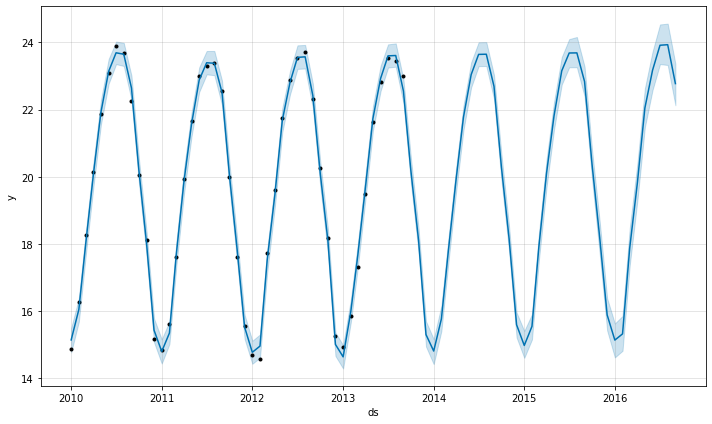

In [25]:
mi_modelo.plot(prediccion,
               uncertainty=True);

Se puede confirmar la tendencia que es creciente desde el 2012, asi como anualmente las mayores temperaturas se encuentran de marzo hasta agosto y empiezan a disminuir de septiembre a enero

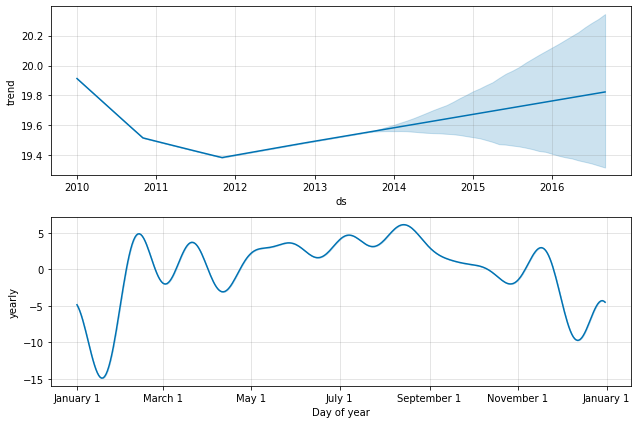

In [26]:
mi_modelo.plot_components(prediccion);